In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from matplotlib.dates import DateFormatter
from tqdm import tqdm
import seaborn as sns
from PIL import Image,ImageOps
from PIL import ImageFont
from PIL import ImageDraw

## Lockdown Lifting Dynamics Simulation and Figures

In [2]:
n_boots = 1000

In [3]:
def model(time,*p):

    E0 = 10**p[2]
    IS0 = 10**p[3]
    A0 = r*IS0
    QS0 = df.active[0]
    RS0 = df.recovered[0]
    D0 = df.dead[0]
    RU0 = r*df.recovered[0]
    RA0 = 0
    P0 = 0
    QA0 = 0
    b = p[0]
    d = p[1]
    ss = 0
    aa = p[4]
    l = p[5]
    k = p[6]

    def dX(X,t):
        a_t=a_test
        a = aa
        s = ss
        d_a_ = d_a
        M = np.array([[ -a,       0,     0,              0,     0,     0,     0,     0,     s,     0,     0],
                      [  0,-(1+r)*g,     0,              0,     0,     0,     0,     0,     0,     0,     0],
                      [  0,       g,    -d,              0,     0,     0,     0,     0,     0,     0,     0],
                      [  0,     r*g,     0, -d_a_-d_a_*a_t,     0,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     d,              0,  -l-k,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,              0,     l,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,              0,     k,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,           d_a_,     0,     0,     0,     0,     0,     0,     0],
                      [  a,       0,     0,              0,     0,     0,     0,     0,    -s,     0,     0],
                      [  0,       0,     0,       d_a_*a_t,     0,     0,     0,     0,     0,    -l,     0],
                      [  0,       0,     0,              0,     0,     0,     0,     0,     0,     l,     0]])
        C = X[0]*X[2]*np.array([[  -b/N],
                                [   b/N],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0]])
        C = C + X[0]*X[3]*np.array([[-a_i*b/N],
                                    [ a_i*b/N],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0]])
        return (np.matmul(M,X.reshape(1,-1).T)+C).flatten()

    return odeint(dX,[N-E0-IS0-QS0-RS0-D0-RU0-P0-QA0-RA0,E0,IS0,A0,QS0,RS0,D0,RU0,P0,QA0,RA0],time)

## Epidemic Plotting Tool

In [4]:
def plot(what_plot=",qt,rt,d,ia,is,qs,rs,cd,ct,dc,cs,"):
        rtn = np.sqrt(n_boots)
        if ",qt," in what_plot:
            ax1.plot(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,4]+preds[:,:,9]).mean(axis=0),
                             color='lightcoral',alpha=1,zorder=0)
            ax1.fill_between(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,4]+preds[:,:,9]).mean(axis=0)-1.96*(preds[:,:,4]+preds[:,:,9]).std(axis=0)/rtn,
                             (preds[:,:,4]+preds[:,:,9]).mean(axis=0)+1.96*(preds[:,:,4]+preds[:,:,9]).std(axis=0)/rtn,
                             color='lightcoral',alpha=0.1,zorder=0)
        # recovered
        if ",rt," in what_plot:
            ax1.plot(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,5]+preds[:,:,10]).mean(axis=0),
                             color='mediumseagreen',alpha=1,zorder=0)
            ax1.fill_between(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,5]+preds[:,:,10]).mean(axis=0)-1.96*(preds[:,:,5]+preds[:,:,10]).std(axis=0)/rtn,
                             (preds[:,:,5]+preds[:,:,10]).mean(axis=0)+1.96*(preds[:,:,5]+preds[:,:,10]).std(axis=0)/rtn,
                             color='mediumseagreen',alpha=0.1,zorder=0)
        # dead
        if ",d," in what_plot:
            ax1.plot(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,6]).mean(axis=0),
                             color='dimgray',alpha=1,zorder=0)
            ax1.fill_between(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,6]).mean(axis=0)-1.96*(preds[:,:,6]).std(axis=0)/rtn,
                             (preds[:,:,6]).mean(axis=0)+1.96*(preds[:,:,6]).std(axis=0)/rtn,
                             color='dimgray',alpha=0.1,zorder=0)

        # Ia
        if ",ia," in what_plot:
            ax1.plot(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,3]).mean(axis=0),
                             color='deepskyblue',alpha=1,zorder=0)
            ax1.fill_between(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,3]).mean(axis=0)-1.96*(preds[:,:,3]).std(axis=0)/rtn,
                             (preds[:,:,3]).mean(axis=0)+1.96*(preds[:,:,3]).std(axis=0)/rtn,
                             color='deepskyblue',alpha=0.1,zorder=0)

        # Is
        if ",is," in what_plot:
            ax1.plot(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,2]).mean(axis=0),
                             color='darkcyan',alpha=1,zorder=0)
            ax1.fill_between(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,2]).mean(axis=0)-1.96*(preds[:,:,2]).std(axis=0)/rtn,
                             (preds[:,:,2]).mean(axis=0)+1.96*(preds[:,:,2]).std(axis=0)/rtn,
                             color='darkcyan',alpha=0.1,zorder=0)
        # Qs
        if ",qs," in what_plot:
            ax1.plot(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,4]).mean(axis=0),
                             color='sienna',alpha=1,zorder=0)
            ax1.fill_between(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,4]).mean(axis=0)-1.96*(preds[:,:,4]).std(axis=0)/rtn,
                             (preds[:,:,4]).mean(axis=0)+1.96*(preds[:,:,4]).std(axis=0)/rtn,
                             color='sienna',alpha=0.1,zorder=0)

        # Rds
        if ",rs," in what_plot:
            ax1.plot(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,5]).mean(axis=0),
                             color='darkslategray',alpha=1,zorder=0)
            ax1.fill_between(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,5]).mean(axis=0)-1.96*(preds[:,:,5]).std(axis=0)/rtn,
                             (preds[:,:,5]).mean(axis=0)+1.96*(preds[:,:,5]).std(axis=0)/rtn,
                             color='darkslategray',alpha=0.1,zorder=0)


        ax1.set_ylim([1,1.2*np.max(preds.mean(axis=0)[:,5]+preds.mean(axis=0)[:,10])])

        if ',qt,' in what_plot:
            ax1.plot(pd.date_range("03/16/2020","04/18/2020"),df[["active"]].values,'+',color='indianred')    
        if ',rt,' in what_plot:
            ax1.plot(pd.date_range("03/16/2020","04/18/2020"),df[["recovered"]].values,'+',color ='seagreen')
        if ',d,' in what_plot:
            ax1.plot(pd.date_range("03/16/2020","04/18/2020"),df[["dead"]].values,'+',color ='darkgrey')
        
        ax1.plot([],[],color='lightcoral',label='   ')
        ax1.plot([],[],color='mediumseagreen',label='   ')
        ax1.plot([],[],color='dimgray',label='   ')
        ax1.plot([],[],color='deepskyblue',label='   ')
        ax1.plot([],[],color='darkcyan',label='   ')
        ax1.plot([],[],color='sienna',label='   ')
        ax1.plot([],[],color='darkslategray',label='   ')

        ax1.legend(loc='upper left',frameon=False,fontsize=8)
        ax1.set_ylabel('Count')

        #Cumulative Detected
        if ",cd," in what_plot:
            ax2.plot(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,4]+preds[:,:,9]+preds[:,:,5]+preds[:,:,10]+preds[:,:,6]).mean(axis=0),
                             color='plum',alpha=1,zorder=0)
            ax2.fill_between(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,4]+preds[:,:,9]+preds[:,:,5]+preds[:,:,10]+preds[:,:,6]).mean(axis=0)-1.96*(preds[:,:,4]+preds[:,:,9]+preds[:,:,5]+preds[:,:,10]+preds[:,:,6]).std(axis=0)/rtn,
                             (preds[:,:,4]+preds[:,:,9]+preds[:,:,5]+preds[:,:,10]+preds[:,:,6]).mean(axis=0)+1.96*(preds[:,:,4]+preds[:,:,9]+preds[:,:,5]+preds[:,:,10]+preds[:,:,6]).std(axis=0)/rtn,
                             color='plum',alpha=0.1,zorder=0)

        #Cumulative Total
        if ",ct," in what_plot:
            ax2.plot(pd.date_range("03/16/2020","04/18/2023"),
                             (N-preds[:,:,0]-preds[:,:,8]).mean(axis=0),
                             color='mediumorchid',alpha=1,zorder=0)
            ax2.fill_between(pd.date_range("03/16/2020","04/18/2023"),
                             (N-preds[:,:,0]-preds[:,:,8]).mean(axis=0)-1.96*(N-preds[:,:,0]-preds[:,:,8]).std(axis=0)/rtn,
                             (N-preds[:,:,0]-preds[:,:,8]).mean(axis=0)+1.96*(N-preds[:,:,0]-preds[:,:,8]).std(axis=0)/rtn,
                             color='mediumorchid',alpha=0.1,zorder=0)

            # Cumulative Symptomatics
        if ",cs," in what_plot:
            ax2.plot(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,5]+preds[:,:,6]+preds[:,:,4]).mean(axis=0),
                             color='navy',alpha=1,zorder=0)
            ax2.fill_between(pd.date_range("03/16/2020","04/18/2023"),
                             (preds[:,:,5]+preds[:,:,6]+preds[:,:,4]).mean(axis=0)-1.96*(preds[:,:,5]+preds[:,:,6]+preds[:,:,4]).std(axis=0)/rtn,
                             (preds[:,:,5]+preds[:,:,6]+preds[:,:,4]).mean(axis=0)+1.96*(preds[:,:,5]+preds[:,:,6]+preds[:,:,4]).std(axis=0)/rtn,
                             color='navy',alpha=0.1,zorder=0)

        ax2.plot([],[],color='plum',label=' ')
        ax2.plot([],[],color='mediumorchid',label=' ')
        ax2.plot([],[],color='navy',label=' ')
        ax2.legend(loc='upper left',frameon=False,fontsize=8)
        ax2.set_ylabel('Count')
        ax2.set_ylim([1,1.2*np.max((N-preds[:,:,0]-preds[:,:,8]).mean(axis=0))])
        #New Cases
        if ",dc," in what_plot:
            ax3.plot(pd.date_range("03/17/2020","04/18/2023"),
                             (np.diff(preds[:,:,4]+preds[:,:,9]+preds[:,:,5]+preds[:,:,10]+preds[:,:,6],axis=1)).mean(axis=0),
                             color='slategray',alpha=1,zorder=0)
            ax3.fill_between(pd.date_range("03/17/2020","04/18/2023"),
                             (np.diff(preds[:,:,4]+preds[:,:,9]+preds[:,:,5]+preds[:,:,10]+preds[:,:,6],axis=1)).mean(axis=0)-1.96*(np.diff(preds[:,:,4]+preds[:,:,9]+preds[:,:,5]+preds[:,:,10]+preds[:,:,6],axis=1)).std(axis=0)/rtn,
                             (np.diff(preds[:,:,4]+preds[:,:,9]+preds[:,:,5]+preds[:,:,10]+preds[:,:,6],axis=1)).mean(axis=0)+1.96*(np.diff(preds[:,:,4]+preds[:,:,9]+preds[:,:,5]+preds[:,:,10]+preds[:,:,6],axis=1)).std(axis=0)/rtn,
                             color='slategray',alpha=0.1,zorder=0)

        ax3.plot([],[],color='slategray',label='   ')
        ax3.legend(loc='upper right',frameon=False,fontsize=8)
        ax3.set_ylabel('Count')

        ax3.set_ylim([1,1.2*np.max(np.diff(preds[:,:,4]+preds[:,:,9]+preds[:,:,5]+preds[:,:,10]+preds[:,:,6],axis=1))])

        ax1.set_xticklabels([])
        ax2.set_xticklabels([])

        ax1.spines["top"].set_visible(False)
        ax1.spines["right"].set_visible(False)
        ax2.spines["top"].set_visible(False)
        ax2.spines["right"].set_visible(False)
        ax3.spines["top"].set_visible(False)
        ax3.spines["right"].set_visible(False)
        return fig,ax1,ax2,ax3

### Predict Future

In [5]:
folder = 'India/a_i_0.25_p_a_0.4_f_a_0.1'
indices = [0]+[int(i.split('_')[-1].split('.')[0])+1 for i in os.listdir(folder+"/bootstrap")]
indices.sort()
gs = np.loadtxt('Model Fitting/latent.csv',delimiter=',')[indices]
d_as = np.loadtxt('Model Fitting/infect.csv',delimiter=',')[indices]

a_i = float(folder.split('_')[2])
p_a = float(folder.split('_')[5])
f_a = float(folder.split('_')[8])

params = np.load(folder+"/parameters.npy")
params.shape
df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
df.columns = ['active','recovered','dead']
N = 1324171354


preds = []

for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
    r = p_a/(1-p_a)
    g = 1/gs[bootstrp_no+1]
    d_a = 1/d_as[bootstrp_no+1]
    a_test = f_a/(1-f_a)
    popt=params[bootstrp_no,:]
    prediction = model(np.arange(0,df.shape[0]+3*365,0.1),*popt)[::10,:]
    preds.append(prediction)
    
preds = np.int32(np.array(preds))

100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [02:05<00:00,  7.95it/s]


## Figure 3.

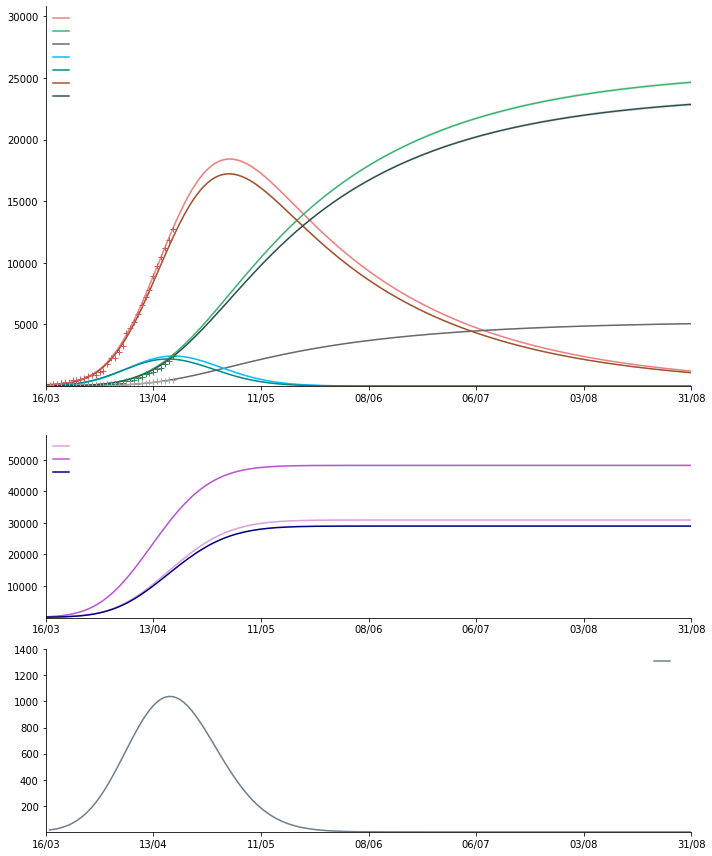

In [6]:
fig = plt.figure(figsize=(10,12))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(4,1,3)
ax3 = plt.subplot(4,1,4)

fig,ax1,ax2,ax3 =plot()

ax1.set_xlim(pd.to_datetime("03/16/2020"),pd.to_datetime("31/08/2020"))
ax1.set_xticks(pd.date_range("03/16/2020","31/08/2020",7))
ax2.set_xlim(pd.to_datetime("03/16/2020"),pd.to_datetime("31/08/2020"))
ax2.set_xticks(pd.date_range("03/16/2020","31/08/2020",7))
ax3.set_xlim(pd.to_datetime("03/16/2020"),pd.to_datetime("31/08/2020"))
ax3.set_xticks(pd.date_range("03/16/2020","31/08/2020",7))

date_form = DateFormatter("%d/%m")
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax3.xaxis.set_major_formatter(date_form)

ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax3.set_xlabel('')
ax3.set_ylabel('')

plt.tight_layout()
plt.savefig("Figures/Fig3.png",transparent=True,dpi=600)

## Supplemental Figure 4.

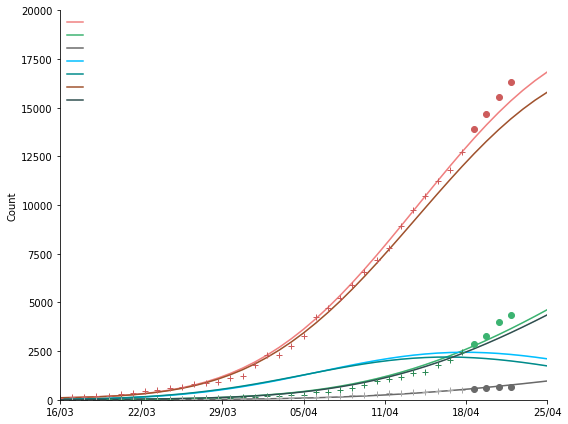

In [7]:
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(1,1,1)

fig,ax1,_,_ =plot(",qt,rt,d,ia,is,qs,rs,")

ax1.plot(pd.date_range("04/19/2020","04/22/2020"),[13891,14678,15549,16321],'o',color ='indianred')
ax1.plot(pd.date_range("04/19/2020","04/22/2020"),[2854,3273,3976,4370],'o',color ='mediumseagreen')
ax1.plot(pd.date_range("04/19/2020","04/22/2020"),[559,592,645,681],'o',color ='dimgray')
ax1.set_xlim(pd.to_datetime("03/16/2020"),pd.to_datetime("25/04/2020"))
ax1.set_xticks(pd.date_range("03/16/2020","25/04/2020",7))
ax1.set_ylim(0,20000)

date_form = DateFormatter("%d/%m")
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax3.xaxis.set_major_formatter(date_form)

plt.tight_layout()
plt.savefig("Figures/SuppFig4.png",transparent=True,dpi=600)

## Lockdown Simulation

In [8]:
def model_complete_relax(time,*p,changeS=None,lag=None):

    E0 = 10**p[2]
    IS0 = 10**p[3]
    A0 = r*IS0
    QS0 = df.active[0]
    RS0 = df.recovered[0]
    D0 = df.dead[0]
    RU0 = r*df.recovered[0]
    RA0 = 0
    P0 = 0
    QA0 = 0
    b = p[0]
    d = p[1]
    ss = 0
    aa = p[4]
    l = p[5]
    k = p[6]

    def dX(X,t):
        a_t=a_test
        d_a_ = d_a
        if ((lag is None and t>df.shape[0]) or (lag is not None and t>df.shape[0]+lag)) and changeS is not None:
            if changeS!=0:
                a = 0
                s=changeS*aa
            else:
                a = aa
                s = ss
        else:
            a = aa
            s = ss
        M = np.array([[ -a,       0,     0,              0,     0,     0,     0,     0,     s,     0,     0],
                      [  0,-(1+r)*g,     0,              0,     0,     0,     0,     0,     0,     0,     0],
                      [  0,       g,    -d,              0,     0,     0,     0,     0,     0,     0,     0],
                      [  0,     r*g,     0, -d_a_-d_a_*a_t,     0,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     d,              0,  -l-k,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,              0,     l,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,              0,     k,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,           d_a_,     0,     0,     0,     0,     0,     0,     0],
                      [  a,       0,     0,              0,     0,     0,     0,     0,    -s,     0,     0],
                      [  0,       0,     0,       d_a_*a_t,     0,     0,     0,     0,     0,    -l,     0],
                      [  0,       0,     0,              0,     0,     0,     0,     0,     0,     l,     0]])
        C = X[0]*X[2]*np.array([[  -b/N],
                                [   b/N],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0]])
        C = C + X[0]*X[3]*np.array([[-a_i*b/N],
                                    [ a_i*b/N],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0]])
        return (np.matmul(M,X.reshape(1,-1).T)+C).flatten()

    return odeint(dX,[N-E0-IS0-QS0-RS0-D0-RU0-P0-QA0-RA0,E0,IS0,A0,QS0,RS0,D0,RU0,P0,QA0,RA0],time)

In [9]:
def model_temporary_relax(time,*p,changeS=None,lag=None,duration=None):

    E0 = 10**p[2]
    IS0 = 10**p[3]
    A0 = r*IS0
    QS0 = df.active[0]
    RS0 = df.recovered[0]
    D0 = df.dead[0]
    RU0 = r*df.recovered[0]
    RA0 = 0
    P0 = 0
    QA0 = 0
    b = p[0]
    d = p[1]
    ss = 0
    aa = p[4]
    l = p[5]
    k = p[6]

    def dX(X,t):
        a_t=a_test
        d_a_ = d_a
        if ((lag is None and t>df.shape[0]) or (lag is not None and t>df.shape[0]+lag)) and changeS is not None:
            if changeS!=0:
                a = 0
                s=changeS*aa
            else:
                a = aa
                s = ss
            if duration is not None and t>df.shape[0]+lag+duration:
                a = aa
                s = ss
        else:
            a = aa
            s = ss
        M = np.array([[ -a,       0,     0,              0,     0,     0,     0,     0,     s,     0,     0],
                      [  0,-(1+r)*g,     0,              0,     0,     0,     0,     0,     0,     0,     0],
                      [  0,       g,    -d,              0,     0,     0,     0,     0,     0,     0,     0],
                      [  0,     r*g,     0, -d_a_-d_a_*a_t,     0,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     d,              0,  -l-k,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,              0,     l,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,              0,     k,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,           d_a_,     0,     0,     0,     0,     0,     0,     0],
                      [  a,       0,     0,              0,     0,     0,     0,     0,    -s,     0,     0],
                      [  0,       0,     0,       d_a_*a_t,     0,     0,     0,     0,     0,    -l,     0],
                      [  0,       0,     0,              0,     0,     0,     0,     0,     0,     l,     0]])
        C = X[0]*X[2]*np.array([[  -b/N],
                                [   b/N],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0]])
        C = C + X[0]*X[3]*np.array([[-a_i*b/N],
                                    [ a_i*b/N],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0]])
        return (np.matmul(M,X.reshape(1,-1).T)+C).flatten()

    return odeint(dX,[N-E0-IS0-QS0-RS0-D0-RU0-P0-QA0-RA0,E0,IS0,A0,QS0,RS0,D0,RU0,P0,QA0,RA0],time)

## Figure 4

100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [07:06<00:00,  2.34it/s]


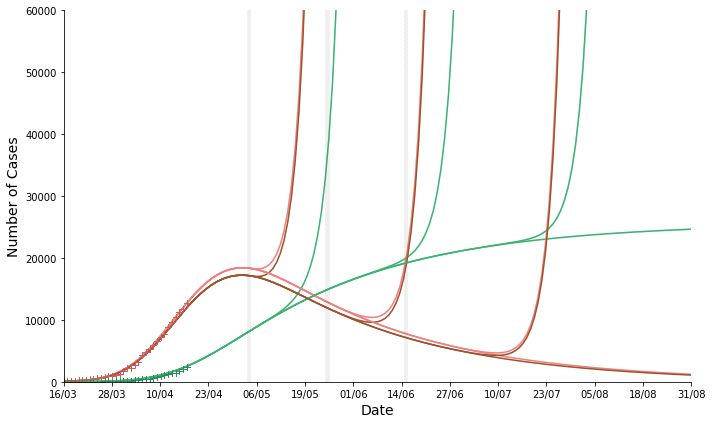

In [25]:
folder = 'India/a_i_0.25_p_a_0.4_f_a_0.1'
indices = [0]+[int(i.split('_')[-1].split('.')[0])+1 for i in os.listdir(folder+"/bootstrap")];indices.sort();

gs = np.loadtxt('Model Fitting/latent.csv',delimiter=',')[indices]
d_as = np.loadtxt('Model Fitting/infect.csv',delimiter=',')[indices]

a_i = float(folder.split('_')[2])
p_a = float(folder.split('_')[5])
f_a = float(folder.split('_')[8])

params = np.load(folder+"/parameters.npy")
df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
df.columns = ['active','recovered','dead']
N = 1324171354

fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,1,1)

preds = []
for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
    r = p_a/(1-p_a)
    g = 1/gs[bootstrp_no+1]
    d_a = 1/d_as[bootstrp_no+1]
    a_test = f_a/(1-f_a)
    popt=params[bootstrp_no,:]
    prediction = model_complete_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt)[::10,:]
    preds.append(prediction)

preds = np.int32(np.array(preds))

fig,ax1,_,_ =plot(",qt,rt,qs,")
    
for lag in [15,15+21,15+42]:
    preds = []
    for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
        r = p_a/(1-p_a)
        g = 1/gs[bootstrp_no+1]
        d_a = 1/d_as[bootstrp_no+1]
        a_test = f_a/(1-f_a)
        popt=params[bootstrp_no,:]
        prediction = model_complete_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt,changeS=15.0,lag=lag)[::10,:]
        preds.append(prediction)

    preds = np.int32(np.array(preds))
    
    fig,ax1,_,_ =plot(",qt,rt,qs,")
    ax1.legend().remove()

ax1.set_xlim(pd.to_datetime("03/16/2020"),pd.to_datetime("31/08/2020"))
ax1.set_xticks(pd.date_range("03/16/2020","31/08/2020",14))
ax1.set_ylim(0,60000)

date_form = DateFormatter("%d/%m")
ax1.xaxis.set_major_formatter(date_form)

ax1.fill_betweenx(np.linspace(0,90000,5),pd.to_datetime("05/04/2020"),pd.to_datetime("05/05/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,90000,5),pd.to_datetime("25/05/2020"),pd.to_datetime("05/26/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,90000,5),pd.to_datetime("15/06/2020"),pd.to_datetime("16/06/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')

ax1.set_xlabel('Date',fontsize=14)
ax1.set_ylabel('Number of Cases',fontsize=14)

plt.tight_layout()
plt.savefig("Figures/Fig4A_Main.png",transparent=True,dpi=600)

100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [03:46<00:00,  4.40it/s]


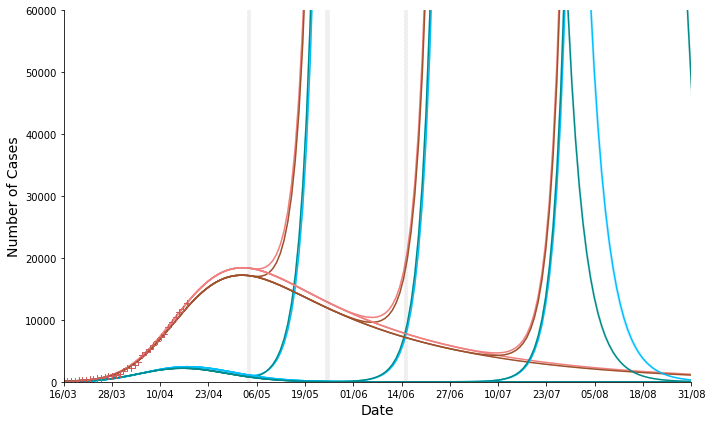

In [11]:
folder = 'India/a_i_0.25_p_a_0.4_f_a_0.1'
indices = [0]+[int(i.split('_')[-1].split('.')[0])+1 for i in os.listdir(folder+"/bootstrap")];indices.sort();

gs = np.loadtxt('Model Fitting/latent.csv',delimiter=',')[indices]
d_as = np.loadtxt('Model Fitting/infect.csv',delimiter=',')[indices]

a_i = float(folder.split('_')[2])
p_a = float(folder.split('_')[5])
f_a = float(folder.split('_')[8])

params = np.load(folder+"/parameters.npy")
df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
df.columns = ['active','recovered','dead']
N = 1324171354

fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,1,1)

preds = []
for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
    r = p_a/(1-p_a)
    g = 1/gs[bootstrp_no+1]
    d_a = 1/d_as[bootstrp_no+1]
    a_test = f_a/(1-f_a)
    popt=params[bootstrp_no,:]
    prediction = model_complete_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt)[::10,:]
    preds.append(prediction)

preds = np.int32(np.array(preds))

fig,ax1,_,_ =plot(",qt,qs,ia,is,")
    
for lag in [15,15+21,15+42]:
    preds = []
    for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
        r = p_a/(1-p_a)
        g = 1/gs[bootstrp_no+1]
        d_a = 1/d_as[bootstrp_no+1]
        a_test = f_a/(1-f_a)
        popt=params[bootstrp_no,:]
        prediction = model_complete_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt,changeS=15.0,lag=lag)[::10,:]
        preds.append(prediction)

    preds = np.int32(np.array(preds))
    
    fig,ax1,_,_ =plot(",qt,qs,ia,is,")
    ax1.legend().remove()

ax1.set_xlim(pd.to_datetime("03/16/2020"),pd.to_datetime("31/08/2020"))
ax1.set_xticks(pd.date_range("03/16/2020","31/08/2020",14))
ax1.set_ylim(0,60000)

date_form = DateFormatter("%d/%m")
ax1.xaxis.set_major_formatter(date_form)

ax1.fill_betweenx(np.linspace(0,90000,5),pd.to_datetime("05/04/2020"),pd.to_datetime("05/05/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,90000,5),pd.to_datetime("25/05/2020"),pd.to_datetime("05/26/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,90000,5),pd.to_datetime("15/06/2020"),pd.to_datetime("16/06/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')

ax1.set_xlabel('Date',fontsize=14)
ax1.set_ylabel('Number of Cases',fontsize=14)

plt.tight_layout()
plt.savefig("Figures/Fig4A_Inset.png",transparent=True,dpi=600)

In [12]:
folder = 'India/a_i_0.25_p_a_0.4_f_a_0.1'
indices = [0]+[int(i.split('_')[-1].split('.')[0])+1 for i in os.listdir(folder+"/bootstrap")];indices.sort();

gs = np.loadtxt('Model Fitting/latent.csv',delimiter=',')[indices]
d_as = np.loadtxt('Model Fitting/infect.csv',delimiter=',')[indices]

a_i = float(folder.split('_')[2])
p_a = float(folder.split('_')[5])
f_a = float(folder.split('_')[8])

params = np.load(folder+"/parameters.npy")
df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
df.columns = ['active','recovered','dead']
N = 1324171354

tmins = []
for lag in np.arange(15,90,7):
    tmin = []
    for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
        r = p_a/(1-p_a)
        g = 1/gs[bootstrp_no+1]
        d_a = 1/d_as[bootstrp_no+1]
        a_test = f_a/(1-f_a)
        popt=params[bootstrp_no,:]
        prediction = model_complete_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt,changeS=15.0,lag=lag)[::10,:]
        qt = prediction[:,4]+prediction[:,9]
        tmin.append(np.argmin(qt[df.shape[0]+lag:df.shape[0]+lag+np.max([np.argmax(qt[df.shape[0]+lag:]),1])]))
    tmin = np.int32(np.array(tmin))
    tmins.append(tmin)
tmins = np.array(tmins)
np.savetxt('Temporary Outputs/Time to New Rise.csv',tmins,delimiter=',')

100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [04:06<00:00,  4.04it/s]


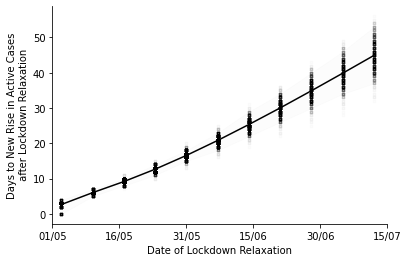

In [13]:
temp = np.loadtxt('Temporary Outputs/Time to New Rise.csv',delimiter=',')
for l in range(temp.shape[1]):
    plt.plot(pd.to_datetime([pd.to_datetime("04/18/20")+pd.DateOffset(i) for i in np.arange(15,90,7)]),temp[:,l],'.k',alpha=0.01)
plt.fill_between(pd.to_datetime([pd.to_datetime("04/18/20")+pd.DateOffset(i) for i in np.arange(15,90,7)]),np.quantile(temp,0.025,axis=1),np.quantile(temp,0.975,axis=1),color='k',alpha=0.01)
plt.plot(pd.to_datetime([pd.to_datetime("04/18/20")+pd.DateOffset(i) for i in np.arange(15,90,7)]),np.mean(temp,axis=1),'-',color='black')

date_form = DateFormatter("%d/%m")

plt.gca().set_xlim(pd.to_datetime("05/01/2020"),pd.to_datetime("07/15/2020"))
plt.gca().set_xticks(pd.date_range("05/01/2020","07/15/2020",6))
plt.gca().set_xticklabels(pd.date_range("05/01/2020","07/15/2020",6))
plt.gca().set_xlabel("Date of Lockdown Relaxation")
plt.gca().set_ylabel("Days to New Rise in Active Cases\n after Lockdown Relaxation")

plt.gca().xaxis.set_major_formatter(date_form)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.savefig("Figures/Fig4B.png",transparent=True,dpi=600)

100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [07:15<00:00,  2.29it/s]


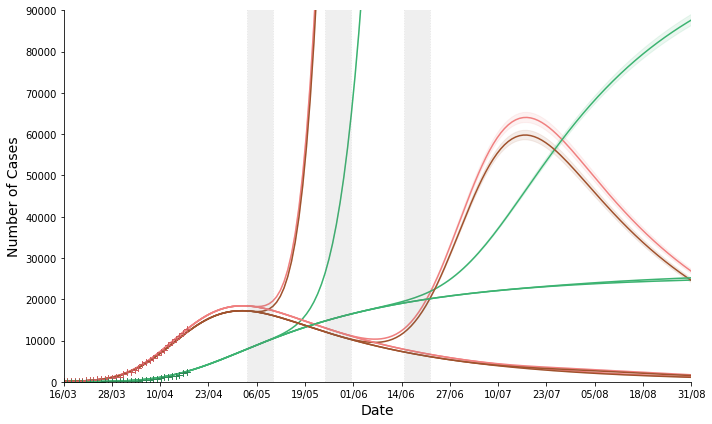

In [26]:
folder = 'India/a_i_0.25_p_a_0.4_f_a_0.1'
indices = [0]+[int(i.split('_')[-1].split('.')[0])+1 for i in os.listdir(folder+"/bootstrap")];indices.sort();

gs = np.loadtxt('Model Fitting/latent.csv',delimiter=',')[indices]
d_as = np.loadtxt('Model Fitting/infect.csv',delimiter=',')[indices]

a_i = float(folder.split('_')[2])
p_a = float(folder.split('_')[5])
f_a = float(folder.split('_')[8])

params = np.load(folder+"/parameters.npy")
df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
df.columns = ['active','recovered','dead']
N = 1324171354

fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,1,1)

preds = []
for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
    r = p_a/(1-p_a)
    g = 1/gs[bootstrp_no+1]
    d_a = 1/d_as[bootstrp_no+1]
    a_test = f_a/(1-f_a)
    popt=params[bootstrp_no,:]
    prediction = model_temporary_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt)[::10,:]
    preds.append(prediction)

preds = np.int32(np.array(preds))

fig,ax1,_,_ =plot(",qt,rt,qs,")
    
for lag in [15,15+21,15+42]:
    preds = []
    for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
        r = p_a/(1-p_a)
        g = 1/gs[bootstrp_no+1]
        d_a = 1/d_as[bootstrp_no+1]
        a_test = f_a/(1-f_a)
        popt=params[bootstrp_no,:]
        prediction = model_temporary_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt,changeS=15.0,lag=lag,duration=7)[::10,:]
        preds.append(prediction)

    preds = np.int32(np.array(preds))
    
    fig,ax1,_,_ =plot(",qt,rt,qs,")
    ax1.legend().remove()

ax1.set_xlim(pd.to_datetime("03/16/2020"),pd.to_datetime("31/08/2020"))
ax1.set_xticks(pd.date_range("03/16/2020","31/08/2020",14))
ax1.set_ylim(0,90000)

date_form = DateFormatter("%d/%m")
ax1.xaxis.set_major_formatter(date_form)

ax1.fill_betweenx(np.linspace(0,900000,5),pd.to_datetime("05/04/2020"),pd.to_datetime("05/11/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,900000,5),pd.to_datetime("05/25/2020"),pd.to_datetime("06/01/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,900000,5),pd.to_datetime("06/15/2020"),pd.to_datetime("06/22/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')

ax1.set_xlabel('Date',fontsize=14)
ax1.set_ylabel('Number of Cases',fontsize=14)

plt.tight_layout()
plt.savefig("Figures/Fig4C_Main.png",transparent=True,dpi=600)

100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [03:37<00:00,  4.59it/s]


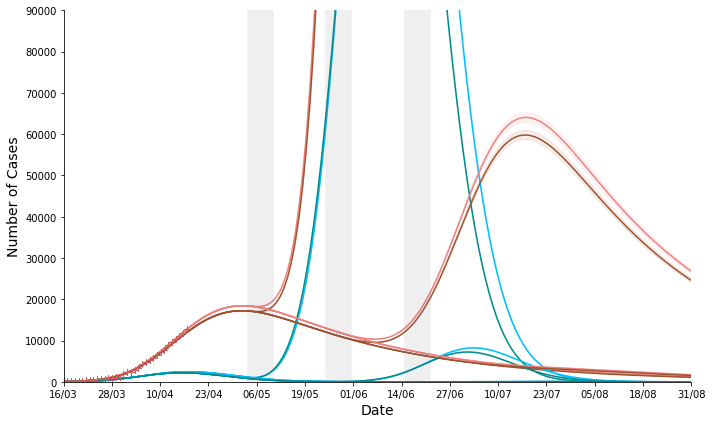

In [15]:
folder = 'India/a_i_0.25_p_a_0.4_f_a_0.1'
indices = [0]+[int(i.split('_')[-1].split('.')[0])+1 for i in os.listdir(folder+"/bootstrap")];indices.sort();

gs = np.loadtxt('Model Fitting/latent.csv',delimiter=',')[indices]
d_as = np.loadtxt('Model Fitting/infect.csv',delimiter=',')[indices]

a_i = float(folder.split('_')[2])
p_a = float(folder.split('_')[5])
f_a = float(folder.split('_')[8])

params = np.load(folder+"/parameters.npy")
df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
df.columns = ['active','recovered','dead']
N = 1324171354

fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,1,1)

preds = []
for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
    r = p_a/(1-p_a)
    g = 1/gs[bootstrp_no+1]
    d_a = 1/d_as[bootstrp_no+1]
    a_test = f_a/(1-f_a)
    popt=params[bootstrp_no,:]
    prediction = model_temporary_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt)[::10,:]
    preds.append(prediction)

preds = np.int32(np.array(preds))

fig,ax1,_,_ =plot(",qt,qs,ia,is,")
    
for lag in [15,15+21,15+42]:
    preds = []
    for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
        r = p_a/(1-p_a)
        g = 1/gs[bootstrp_no+1]
        d_a = 1/d_as[bootstrp_no+1]
        a_test = f_a/(1-f_a)
        popt=params[bootstrp_no,:]
        prediction = model_temporary_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt,changeS=15.0,lag=lag,duration=7)[::10,:]
        preds.append(prediction)

    preds = np.int32(np.array(preds))
    
    fig,ax1,_,_ =plot(",qt,qs,ia,is,")
    ax1.legend().remove()

ax1.set_xlim(pd.to_datetime("03/16/2020"),pd.to_datetime("31/08/2020"))
ax1.set_xticks(pd.date_range("03/16/2020","31/08/2020",14))
ax1.set_ylim(0,90000)

date_form = DateFormatter("%d/%m")
ax1.xaxis.set_major_formatter(date_form)

ax1.fill_betweenx(np.linspace(0,900000,5),pd.to_datetime("05/04/2020"),pd.to_datetime("05/11/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,900000,5),pd.to_datetime("05/25/2020"),pd.to_datetime("06/01/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,900000,5),pd.to_datetime("06/15/2020"),pd.to_datetime("06/22/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')

ax1.set_xlabel('Date',fontsize=14)
ax1.set_ylabel('Number of Cases',fontsize=14)

plt.tight_layout()
plt.savefig("Figures/Fig4C_Inset.png",transparent=True,dpi=600)

In [16]:
folder = 'India/a_i_0.25_p_a_0.4_f_a_0.1'
indices = [0]+[int(i.split('_')[-1].split('.')[0])+1 for i in os.listdir(folder+"/bootstrap")];indices.sort();

gs = np.loadtxt('Model Fitting/latent.csv',delimiter=',')[indices]
d_as = np.loadtxt('Model Fitting/infect.csv',delimiter=',')[indices]

a_i = float(folder.split('_')[2])
p_a = float(folder.split('_')[5])
f_a = float(folder.split('_')[8])

params = np.load(folder+"/parameters.npy")
df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
df.columns = ['active','recovered','dead']
N = 1324171354

peaks = []
overloads = []
for lag in np.arange(15,65,7):
    for duration in [None,7,14,21,28]:
        peak = []
        overload = []
        for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
            r = p_a/(1-p_a)
            g = 1/gs[bootstrp_no+1]
            d_a = 1/d_as[bootstrp_no+1]
            a_test = f_a/(1-f_a)
            popt=params[bootstrp_no,:]
            prediction = model_temporary_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt,changeS=15.0,lag=lag,duration=duration)[::10,:]
            qt = prediction[:,4]+prediction[:,9]
            peak.append(np.max(qt[df.shape[0]+lag:]))
            overload.append(np.argmax(prediction[:,4][df.shape[0]+lag:]>=700000))
        peak = np.int32(np.array(peak))
        peaks.append(peak)
        overload = np.int32(np.array(overload))
        overloads.append(overload)

peaks = np.array(peaks)
np.savetxt('Temporary Outputs/Peak Active Cases.csv',peaks,delimiter=',')
overloads = np.array(overloads)
np.savetxt('Temporary Outputs/Hospital Overload.csv',overloads,delimiter=',')

100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [05:17<00:00,  3.14it/s]


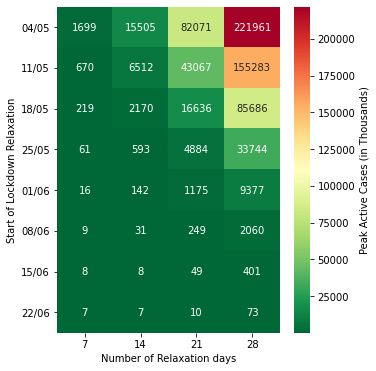

In [17]:
temp = np.loadtxt('Temporary Outputs/Peak Active Cases.csv',delimiter=',')
plt.figure(figsize=(5,6))
sns.heatmap(np.median(temp,axis=1).reshape(8,5)[:,1:]/1000,annot=True,fmt="0.0f",cmap='RdYlGn_r',cbar_kws={'label': 'Peak Active Cases (in Thousands)'})
plt.ylim([8,0])
plt.gca().set_xticklabels([7,14,21,28])
plt.gca().set_yticklabels([(pd.to_datetime("04/18/20")+pd.DateOffset(i+1)).strftime("%d/%m") for i in np.arange(15,65,7)])
plt.gca().set_xlabel("Number of Relaxation days")
plt.gca().set_ylabel("Start of Lockdown Relaxation")
plt.yticks(rotation=0)
plt.savefig("Figures/Fig4D.png",transparent=True,dpi=600)

## Supplementary Fig. 18

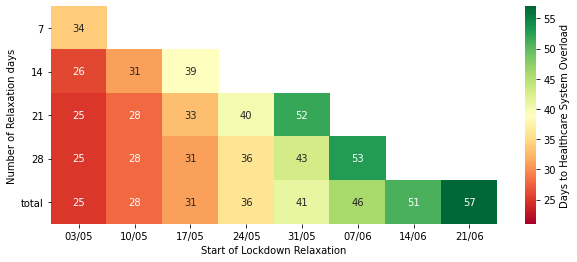

In [18]:
temp = np.loadtxt('Temporary Outputs/Hospital Overload.csv',delimiter=',')
plt.figure(figsize=(10,4))
temp = np.median(temp,axis=1).reshape(8,5)
temp = np.roll(temp,-1,axis=1)
sns.heatmap(temp[:,:5].T,annot=True,fmt="0.0f",cmap='RdYlGn',mask=temp[:,:5].T==0,vmin=21,cbar_kws={'label': 'Days to Healthcare System Overload'})
plt.ylim([5,0])
plt.gca().set_yticklabels([7,14,21,28,"total"],rotation=0)
plt.gca().set_xticklabels([(pd.to_datetime("04/18/20")+pd.DateOffset(i)).strftime("%d/%m") for i in np.arange(15,65,7)])
plt.gca().set_ylabel("Number of Relaxation days")
plt.gca().set_xlabel("Start of Lockdown Relaxation")
plt.savefig("Figures/SuppFig18.png",transparent=True,dpi=600)
plt.show()

## Supplementary Figure 15

100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [04:33<00:00,  3.65it/s]


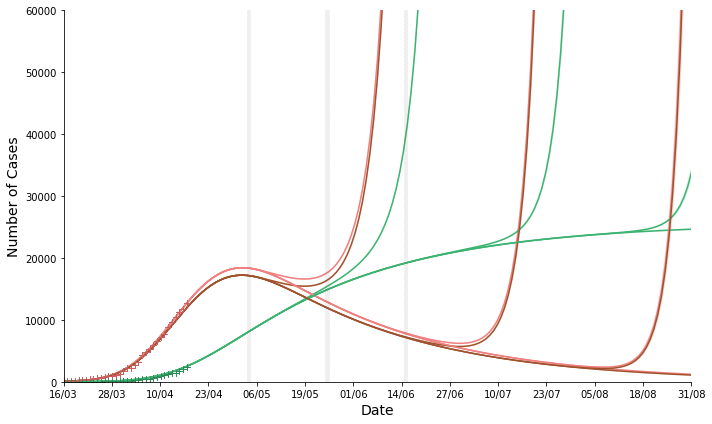

In [28]:
folder = 'India/a_i_0.25_p_a_0.4_f_a_0.1'
indices = [0]+[int(i.split('_')[-1].split('.')[0])+1 for i in os.listdir(folder+"/bootstrap")];indices.sort();

gs = np.loadtxt('Model Fitting/latent.csv',delimiter=',')[indices]
d_as = np.loadtxt('Model Fitting/infect.csv',delimiter=',')[indices]

a_i = float(folder.split('_')[2])
p_a = float(folder.split('_')[5])
f_a = float(folder.split('_')[8])

params = np.load(folder+"/parameters.npy")
df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
df.columns = ['active','recovered','dead']
N = 1324171354

fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,1,1)

preds = []
for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
    r = p_a/(1-p_a)
    g = 1/gs[bootstrp_no+1]
    d_a = 1/d_as[bootstrp_no+1]
    a_test = f_a/(1-f_a)
    popt=params[bootstrp_no,:]
    prediction = model_complete_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt)[::10,:]
    preds.append(prediction)

preds = np.int32(np.array(preds))

fig,ax1,_,_ =plot(",qt,rt,qs,")
    
for lag in [15,15+21,15+42]:
    preds = []
    for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
        r = p_a/(1-p_a)
        g = 1/gs[bootstrp_no+1]
        d_a = 1/d_as[bootstrp_no+1]
        a_test = f_a/(1-f_a)
        popt=params[bootstrp_no,:]
        prediction = model_complete_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt,changeS=1.0,lag=lag)[::10,:]
        preds.append(prediction)

    preds = np.int32(np.array(preds))
    
    fig,ax1,_,_ =plot(",qt,rt,qs,")
    ax1.legend().remove()

ax1.set_xlim(pd.to_datetime("03/16/2020"),pd.to_datetime("31/08/2020"))
ax1.set_xticks(pd.date_range("03/16/2020","31/08/2020",14))
ax1.set_ylim(0,60000)

date_form = DateFormatter("%d/%m")
ax1.xaxis.set_major_formatter(date_form)

ax1.fill_betweenx(np.linspace(0,90000,5),pd.to_datetime("05/04/2020"),pd.to_datetime("05/05/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,90000,5),pd.to_datetime("25/05/2020"),pd.to_datetime("05/26/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,90000,5),pd.to_datetime("15/06/2020"),pd.to_datetime("16/06/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')

ax1.set_xlabel('Date',fontsize=14)
ax1.set_ylabel('Number of Cases',fontsize=14)

plt.tight_layout()
plt.savefig("Figures/SuppFig15_Main.png",transparent=True,dpi=600)

100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [06:49<00:00,  2.44it/s]


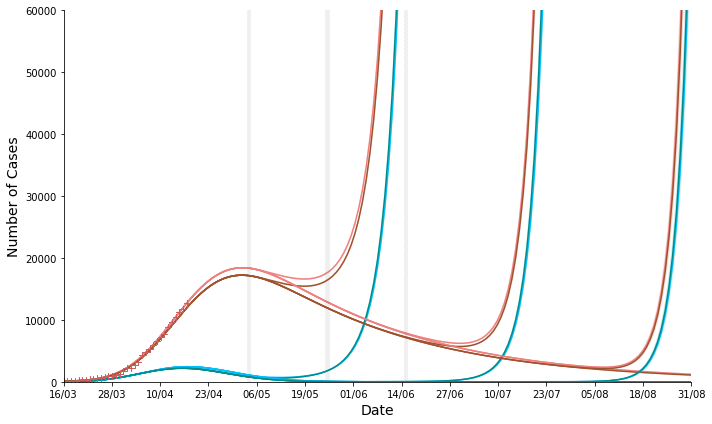

In [20]:
folder = 'India/a_i_0.25_p_a_0.4_f_a_0.1'
indices = [0]+[int(i.split('_')[-1].split('.')[0])+1 for i in os.listdir(folder+"/bootstrap")];indices.sort();

gs = np.loadtxt('Model Fitting/latent.csv',delimiter=',')[indices]
d_as = np.loadtxt('Model Fitting/infect.csv',delimiter=',')[indices]

a_i = float(folder.split('_')[2])
p_a = float(folder.split('_')[5])
f_a = float(folder.split('_')[8])

params = np.load(folder+"/parameters.npy")
df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
df.columns = ['active','recovered','dead']
N = 1324171354

fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,1,1)

preds = []
for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
    r = p_a/(1-p_a)
    g = 1/gs[bootstrp_no+1]
    d_a = 1/d_as[bootstrp_no+1]
    a_test = f_a/(1-f_a)
    popt=params[bootstrp_no,:]
    prediction = model_complete_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt)[::10,:]
    preds.append(prediction)

preds = np.int32(np.array(preds))

fig,ax1,_,_ =plot(",qt,qs,ia,is,")
    
for lag in [15,15+21,15+42]:
    preds = []
    for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
        r = p_a/(1-p_a)
        g = 1/gs[bootstrp_no+1]
        d_a = 1/d_as[bootstrp_no+1]
        a_test = f_a/(1-f_a)
        popt=params[bootstrp_no,:]
        prediction = model_complete_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt,changeS=1.0,lag=lag)[::10,:]
        preds.append(prediction)

    preds = np.int32(np.array(preds))
    
    fig,ax1,_,_ =plot(",qt,qs,ia,is,")
    ax1.legend().remove()

ax1.set_xlim(pd.to_datetime("03/16/2020"),pd.to_datetime("31/08/2020"))
ax1.set_xticks(pd.date_range("03/16/2020","31/08/2020",14))
ax1.set_ylim(0,60000)

date_form = DateFormatter("%d/%m")
ax1.xaxis.set_major_formatter(date_form)

ax1.fill_betweenx(np.linspace(0,90000,5),pd.to_datetime("05/04/2020"),pd.to_datetime("05/05/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,90000,5),pd.to_datetime("25/05/2020"),pd.to_datetime("05/26/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,90000,5),pd.to_datetime("15/06/2020"),pd.to_datetime("16/06/2020"),alpha=0.1,color='dimgrey',linestyle='dotted')

ax1.set_xlabel('Date',fontsize=14)
ax1.set_ylabel('Number of Cases',fontsize=14)

plt.tight_layout()
plt.savefig("Figures/SuppFig15_Inset.png",transparent=True,dpi=600)

In [21]:
folder = 'India/a_i_0.25_p_a_0.4_f_a_0.1'
indices = [0]+[int(i.split('_')[-1].split('.')[0])+1 for i in os.listdir(folder+"/bootstrap")];indices.sort();

gs = np.loadtxt('Model Fitting/latent.csv',delimiter=',')[indices]
d_as = np.loadtxt('Model Fitting/infect.csv',delimiter=',')[indices]

a_i = float(folder.split('_')[2])
p_a = float(folder.split('_')[5])
f_a = float(folder.split('_')[8])

params = np.load(folder+"/parameters.npy")
df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
df.columns = ['active','recovered','dead']
N = 1324171354

tmins = []
for lag in np.arange(15,90,7):
    tmin = []
    for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
        r = p_a/(1-p_a)
        g = 1/gs[bootstrp_no+1]
        d_a = 1/d_as[bootstrp_no+1]
        a_test = f_a/(1-f_a)
        popt=params[bootstrp_no,:]
        prediction = model_complete_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt,changeS=1.0,lag=lag)[::10,:]
        qt = prediction[:,4]+prediction[:,9]
        tmin.append(np.argmin(qt[df.shape[0]+lag:df.shape[0]+lag+np.max([np.argmax(qt[df.shape[0]+lag:]),1])]))
    tmin = np.int32(np.array(tmin))
    tmins.append(tmin)
tmins = np.array(tmins)
np.savetxt('Temporary Outputs/Time to New Rise (Slow).csv',tmins,delimiter=',')

100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [04:41<00:00,  3.54it/s]


## Supplementary Figure 16

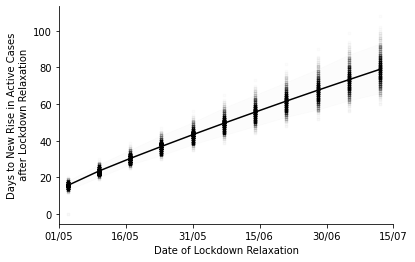

In [22]:
temp = np.loadtxt('Temporary Outputs/Time to New Rise (Slow).csv',delimiter=',')
for l in range(temp.shape[1]):
    plt.plot(pd.to_datetime([pd.to_datetime("04/18/20")+pd.DateOffset(i) for i in np.arange(15,90,7)]),temp[:,l],'.k',alpha=0.01)
plt.fill_between(pd.to_datetime([pd.to_datetime("04/18/20")+pd.DateOffset(i) for i in np.arange(15,90,7)]),np.quantile(temp,0.025,axis=1),np.quantile(temp,0.975,axis=1),color='k',alpha=0.01)
plt.plot(pd.to_datetime([pd.to_datetime("04/18/20")+pd.DateOffset(i) for i in np.arange(15,90,7)]),np.mean(temp,axis=1),'-',color='black')

date_form = DateFormatter("%d/%m")

plt.gca().set_xlim(pd.to_datetime("05/01/2020"),pd.to_datetime("07/15/2020"))
plt.gca().set_xticks(pd.date_range("05/01/2020","07/15/2020",6))
plt.gca().set_xticklabels(pd.date_range("05/01/2020","07/15/2020",6))
plt.gca().set_xlabel("Date of Lockdown Relaxation")
plt.gca().set_ylabel("Days to New Rise in Active Cases\n after Lockdown Relaxation")

plt.gca().xaxis.set_major_formatter(date_form)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.savefig("Figures/SuppFig16.png",transparent=True,dpi=600)

## Supplementary Figure 17

100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [03:34<00:00,  4.65it/s]


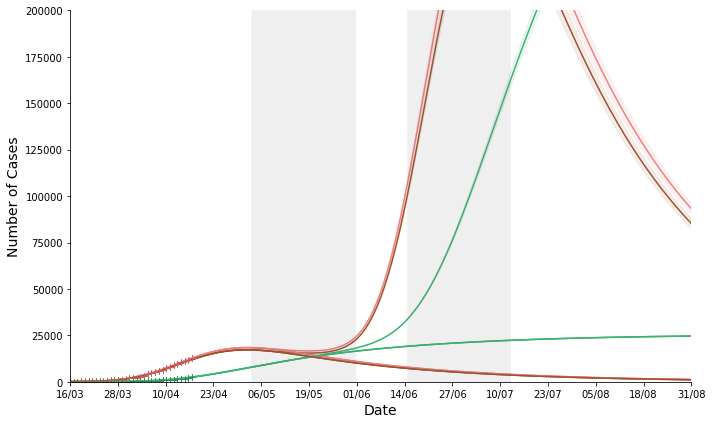

In [29]:
folder = 'India/a_i_0.25_p_a_0.4_f_a_0.1'
indices = [0]+[int(i.split('_')[-1].split('.')[0])+1 for i in os.listdir(folder+"/bootstrap")];indices.sort();

gs = np.loadtxt('Model Fitting/latent.csv',delimiter=',')[indices]
d_as = np.loadtxt('Model Fitting/infect.csv',delimiter=',')[indices]

a_i = float(folder.split('_')[2])
p_a = float(folder.split('_')[5])
f_a = float(folder.split('_')[8])

params = np.load(folder+"/parameters.npy")
df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
df.columns = ['active','recovered','dead']
N = 1324171354

fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,1,1)

preds = []
for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
    r = p_a/(1-p_a)
    g = 1/gs[bootstrp_no+1]
    d_a = 1/d_as[bootstrp_no+1]
    a_test = f_a/(1-f_a)
    popt=params[bootstrp_no,:]
    prediction = model_temporary_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt)[::10,:]
    preds.append(prediction)

preds = np.int32(np.array(preds))

fig,ax1,_,_ =plot(",qt,rt,qs,")
    
for lag in [15,15+42]:
    preds = []
    for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
        r = p_a/(1-p_a)
        g = 1/gs[bootstrp_no+1]
        d_a = 1/d_as[bootstrp_no+1]
        a_test = f_a/(1-f_a)
        popt=params[bootstrp_no,:]
        prediction = model_temporary_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt,changeS=1.0,lag=lag,duration=28)[::10,:]
        preds.append(prediction)

    preds = np.int32(np.array(preds))
    
    fig,ax1,_,_ =plot(",qt,rt,qs,")
    ax1.legend().remove()

ax1.set_xlim(pd.to_datetime("03/16/2020"),pd.to_datetime("31/08/2020"))
ax1.set_xticks(pd.date_range("03/16/2020","31/08/2020",14))
ax1.set_ylim(0,200000)

date_form = DateFormatter("%d/%m")
ax1.xaxis.set_major_formatter(date_form)

ax1.fill_betweenx(np.linspace(0,900000,5),pd.to_datetime("05/04/2020"),pd.to_datetime("05/04/2020")+pd.DateOffset(days=28),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,900000,5),pd.to_datetime("06/15/2020"),pd.to_datetime("06/15/2020")+pd.DateOffset(days=28),alpha=0.1,color='dimgrey',linestyle='dotted')

ax1.set_xlabel('Date',fontsize=14)
ax1.set_ylabel('Number of Cases',fontsize=14)

plt.tight_layout()
plt.savefig("Figures/SuppFig17_Main.png",transparent=True,dpi=600)

100%|████████████████████████████████████████████████████████████████████████████████| 997/997 [05:12<00:00,  3.19it/s]


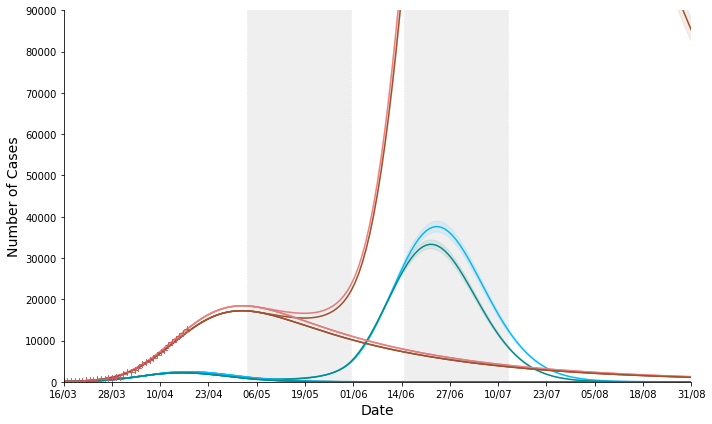

In [24]:
folder = 'India/a_i_0.25_p_a_0.4_f_a_0.1'
indices = [0]+[int(i.split('_')[-1].split('.')[0])+1 for i in os.listdir(folder+"/bootstrap")];indices.sort();

gs = np.loadtxt('Model Fitting/latent.csv',delimiter=',')[indices]
d_as = np.loadtxt('Model Fitting/infect.csv',delimiter=',')[indices]

a_i = float(folder.split('_')[2])
p_a = float(folder.split('_')[5])
f_a = float(folder.split('_')[8])

params = np.load(folder+"/parameters.npy")
df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
df.columns = ['active','recovered','dead']
N = 1324171354

fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,1,1)

preds = []
for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
    r = p_a/(1-p_a)
    g = 1/gs[bootstrp_no+1]
    d_a = 1/d_as[bootstrp_no+1]
    a_test = f_a/(1-f_a)
    popt=params[bootstrp_no,:]
    prediction = model_temporary_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt)[::10,:]
    preds.append(prediction)

preds = np.int32(np.array(preds))

fig,ax1,_,_ =plot(",qt,qs,ia,is,")
    
for lag in [15,15+42]:
    preds = []
    for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
        r = p_a/(1-p_a)
        g = 1/gs[bootstrp_no+1]
        d_a = 1/d_as[bootstrp_no+1]
        a_test = f_a/(1-f_a)
        popt=params[bootstrp_no,:]
        prediction = model_temporary_relax(np.arange(0,df.shape[0]+3*365,0.1),*popt,changeS=1.0,lag=lag,duration=28)[::10,:]
        preds.append(prediction)

    preds = np.int32(np.array(preds))
    
    fig,ax1,_,_ =plot(",qt,qs,ia,is,")
    ax1.legend().remove()

ax1.set_xlim(pd.to_datetime("03/16/2020"),pd.to_datetime("31/08/2020"))
ax1.set_xticks(pd.date_range("03/16/2020","31/08/2020",14))
ax1.set_ylim(0,90000)

date_form = DateFormatter("%d/%m")
ax1.xaxis.set_major_formatter(date_form)

ax1.fill_betweenx(np.linspace(0,900000,5),pd.to_datetime("05/04/2020"),pd.to_datetime("05/04/2020")+pd.DateOffset(days=28),alpha=0.1,color='dimgrey',linestyle='dotted')
ax1.fill_betweenx(np.linspace(0,900000,5),pd.to_datetime("06/15/2020"),pd.to_datetime("06/15/2020")+pd.DateOffset(days=28),alpha=0.1,color='dimgrey',linestyle='dotted')

ax1.set_xlabel('Date',fontsize=14)
ax1.set_ylabel('Number of Cases',fontsize=14)

plt.tight_layout()
plt.savefig("Figures/SuppFig17_Inset.png",transparent=True,dpi=600)

## Correlation Calculation

In [16]:
def pearsonr_ci(x,y,alpha=0.05):
    from scipy import stats
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [19]:
temp = np.loadtxt('Temporary Outputs/Time to New Rise.csv',delimiter=',')
y = temp.T.flatten()
x = np.tile(np.arange(11),997)
pearsonr_ci(x,y)

(0.9848523207878478, 0.0, 0.9842790405330739, 0.9854048495802356)

In [20]:
temp = np.loadtxt('Temporary Outputs/Time to New Rise (Slow).csv',delimiter=',')
y = temp.T.flatten()
x = np.tile(np.arange(11),997)
pearsonr_ci(x,y)

(0.9774263470877816, 0.0, 0.9765753396511265, 0.9782467780590753)

## Testing Dynamics Simulation and Figures

In [3]:
def model_testing(time,*p,lag=None,changeTesting=None,changeTransmission=None):

    E0 = 10**p[2]
    IS0 = 10**p[3]
    A0 = r*IS0
    QS0 = df.active[0]
    RS0 = df.recovered[0]
    D0 = df.dead[0]
    RU0 = r*df.recovered[0]
    RA0 = 0
    P0 = 0
    QA0 = 0
    b = p[0]
    d = p[1]
    ss = 0
    aa = p[4]
    l = p[5]
    k = p[6]

    def dX(X,t):
        d_a_ = d_a
        if ((lag is None and t>df.shape[0]) or (lag is not None and t>df.shape[0]+lag)) and changeTesting is not None and changeTransmission is not None:
            b_ = changeTransmission*b
            a_t=changeTesting/(1-changeTesting)
            a = 0
            s = 1.0
        else:
            a_t=a_test
            a = aa
            s = ss
            b_ = b
        M = np.array([[ -a,       0,     0,              0,     0,     0,     0,     0,     s,     0,     0],
                      [  0,-(1+r)*g,     0,              0,     0,     0,     0,     0,     0,     0,     0],
                      [  0,       g,    -d,              0,     0,     0,     0,     0,     0,     0,     0],
                      [  0,     r*g,     0, -d_a_-d_a_*a_t,     0,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     d,              0,  -l-k,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,              0,     l,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,              0,     k,     0,     0,     0,     0,     0,     0],
                      [  0,       0,     0,           d_a_,     0,     0,     0,     0,     0,     0,     0],
                      [  a,       0,     0,              0,     0,     0,     0,     0,    -s,     0,     0],
                      [  0,       0,     0,       d_a_*a_t,     0,     0,     0,     0,     0,    -l,     0],
                      [  0,       0,     0,              0,     0,     0,     0,     0,     0,     l,     0]])
        C = X[0]*X[2]*np.array([[  -b_/N],
                                [   b_/N],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0],
                                [     0]])
        C = C + X[0]*X[3]*np.array([[-a_i*b_/N],
                                    [ a_i*b_/N],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0],
                                    [       0]])
        return (np.matmul(M,X.reshape(1,-1).T)+C).flatten()

    return odeint(dX,[N-E0-IS0-QS0-RS0-D0-RU0-P0-QA0-RA0,E0,IS0,A0,QS0,RS0,D0,RU0,P0,QA0,RA0],time)

In [4]:
overwrite = False

In [5]:
if overwrite:
    f = open("output_testing.csv", "w")
    f.write("Relative Infectivity,Fraction Asymptomatic,Fraction of detected asymptomatics,New Transmission Rate,New Fraction of detected asymptomatics")
    for TT in range(7):
        f.write(f",Detected T{TT+1},Detected T{TT+1} (lower 95%),Detected T{TT+1} (upper 95%),Total Infected T{TT+1},Total Infected T{TT+1} (lower 95%),Total Infected T{TT+1} (upper 95%),Detected Symptomatic T{TT+1},Detected Symptomatic T{TT+1} (lower 95%),Detected Symptomatic T{TT+1} (upper 95%)")
    f.write("\n")
else:
    f = open("output_testing.csv", "a")
    completed = [tuple(i) for i in pd.read_csv("output_testing.csv",index_col=False).dropna().iloc[:,[1,3,4]].values]

for testing in [0.1,0.2,0.3,0.4,0.5,0.6,0.8]:
    for transmission in [1,0.9,0.8,0.7,0.6,0.5,0.3]:
        for p_a in [0.2,0.4,0.6,0.8]:
            if tuple([p_a,transmission*100,testing*100]) in completed:
                continue
            print([p_a,transmission*100,testing*100])
            folder = f'India/a_i_0.25_p_a_{p_a:0.1f}_f_a_0.1'
            indices = [0]+[int(i.split('_')[-1].split('.')[0])+1 for i in os.listdir(folder+"/bootstrap")];indices.sort();
            
            gs = np.loadtxt('Model Fitting/latent.csv',delimiter=',')[indices]
            d_as = np.loadtxt('Model Fitting/infect.csv',delimiter=',')[indices]
            
            a_i = float(folder.split('_')[2])
            p_a = float(folder.split('_')[5])
            f_a = float(folder.split('_')[8])

            params = np.load(folder+"/parameters.npy")
            df = pd.DataFrame(np.load(folder+"/data.npy")[:-1,:],index=pd.date_range("03/16/2020","04/18/2020"))
            df.columns = ['active','recovered','dead']
            N = 1324171354

            nDet_max = []
            nTotal_max = []
            nSymp_max = []
            
            lag = 15
            
            for bootstrp_no in tqdm(range(min([n_boots,len(indices)-1]))):
                r = p_a/(1-p_a)
                g = 1/gs[bootstrp_no+1]
                d_a = 1/d_as[bootstrp_no+1]
                a_test = f_a/(1-f_a)
                popt=params[bootstrp_no,:]
                prediction = model_testing(np.arange(0,df.shape[0]+365,0.1),*popt,lag=lag,changeTesting=testing,changeTransmission=transmission)[::10,:]
                nDet_max.append((prediction[:,5]+prediction[:,6]+prediction[:,4]+prediction[:,9]+prediction[:,10]))
                nTotal_max.append((N-prediction[:,0]-prediction[:,8]))
                nSymp_max.append((prediction[:,5]+prediction[:,6]+prediction[:,4]))
            
            nDet_max = np.array(nDet_max)
            nSymp_max = np.array(nSymp_max) 
            nTotal_max = np.array(nTotal_max)
            
            f.write("{},{},{},{},{},".format(folder.split('_')[2],folder.split('_')[5],folder.split('_')[8],transmission*100,testing*100))
            for TT in range(7):
                f.write("{:0.0f},{:0.0f},{:0.0f},".format(np.mean(nDet_max[:,df.shape[0]+15+15*TT]),np.quantile(nDet_max[:,df.shape[0]+15+15*TT],0.025),np.quantile(nDet_max[:,df.shape[0]+15+15*TT],0.975)))
                f.write("{:0.0f},{:0.0f},{:0.0f},".format(np.mean(nTotal_max[:,df.shape[0]+15+15*TT]),np.quantile(nTotal_max[:,df.shape[0]+15+15*TT],0.025),np.quantile(nTotal_max[:,df.shape[0]+15+15*TT],0.975)))
                f.write("{:0.0f},{:0.0f},{:0.0f},".format(np.mean(nSymp_max[:,df.shape[0]+15+15*TT]),np.quantile(nSymp_max[:,df.shape[0]+15+15*TT],0.025),np.quantile(nSymp_max[:,df.shape[0]+15+15*TT],0.975)))
            f.write("\n")                
f.close()

df = pd.read_csv("output_testing.csv")
temp = df.columns
df = df.reset_index().dropna(axis=1)
df.columns = temp
df.to_csv("output_testing.csv")

  0%|                                                                                          | 0/999 [00:00<?, ?it/s]

[0.8, 90.0, 50.0]


  0%|                                                                                 | 1/1000 [00:00<03:03,  5.43it/s]

[0.2, 80.0, 50.0]


  0%|                                                                                  | 1/997 [00:00<02:34,  6.45it/s]

[0.4, 80.0, 50.0]


  0%|                                                                                 | 1/1000 [00:00<02:57,  5.63it/s]

[0.6, 80.0, 50.0]


  0%|                                                                                  | 1/999 [00:00<03:38,  4.56it/s]

[0.8, 80.0, 50.0]


  0%|                                                                                 | 1/1000 [00:00<03:04,  5.42it/s]

[0.2, 70.0, 50.0]


  0%|                                                                                  | 1/997 [00:00<02:36,  6.34it/s]

[0.4, 70.0, 50.0]


  0%|                                                                                 | 1/1000 [00:00<03:35,  4.64it/s]

[0.6, 70.0, 50.0]


  0%|                                                                                          | 0/999 [00:00<?, ?it/s]

[0.8, 70.0, 50.0]


  0%|▏                                                                                | 2/1000 [00:00<02:31,  6.57it/s]

[0.2, 60.0, 50.0]


  0%|                                                                                  | 1/997 [00:00<03:45,  4.42it/s]

[0.4, 60.0, 50.0]


  0%|                                                                                 | 1/1000 [00:00<03:11,  5.22it/s]

[0.6, 60.0, 50.0]


  0%|                                                                                  | 1/999 [00:00<03:35,  4.64it/s]

[0.8, 60.0, 50.0]


  0%|▏                                                                                | 2/1000 [00:00<02:33,  6.52it/s]

[0.2, 50.0, 50.0]


  0%|                                                                                  | 1/997 [00:00<02:52,  5.76it/s]

[0.4, 50.0, 50.0]


  0%|▏                                                                                | 2/1000 [00:00<02:19,  7.16it/s]

[0.6, 50.0, 50.0]


  0%|                                                                                          | 0/999 [00:00<?, ?it/s]

[0.8, 50.0, 50.0]


  0%|                                                                                 | 1/1000 [00:00<02:25,  6.87it/s]

[0.2, 30.0, 50.0]


  0%|                                                                                  | 1/997 [00:00<02:46,  5.97it/s]

[0.4, 30.0, 50.0]


  0%|                                                                                 | 1/1000 [00:00<02:48,  5.93it/s]

[0.6, 30.0, 50.0]


  0%|                                                                                          | 0/999 [00:00<?, ?it/s]

[0.8, 30.0, 50.0]


  0%|                                                                                 | 1/1000 [00:00<02:34,  6.47it/s]

[0.2, 100, 60.0]


  0%|▏                                                                                 | 2/997 [00:00<02:17,  7.23it/s]

[0.4, 100, 60.0]


  0%|▏                                                                                | 2/1000 [00:00<02:22,  7.01it/s]

[0.6, 100, 60.0]


  0%|                                                                                  | 1/999 [00:00<03:40,  4.52it/s]

[0.8, 100, 60.0]


  0%|▏                                                                                | 2/1000 [00:00<02:21,  7.07it/s]

[0.2, 90.0, 60.0]


  0%|▏                                                                                 | 2/997 [00:00<02:23,  6.93it/s]

[0.4, 90.0, 60.0]


  0%|▏                                                                                | 2/1000 [00:00<02:26,  6.83it/s]

[0.6, 90.0, 60.0]


  0%|                                                                                  | 1/999 [00:00<03:13,  5.17it/s]

[0.8, 90.0, 60.0]


  0%|▏                                                                                | 2/1000 [00:00<02:12,  7.54it/s]

[0.2, 80.0, 60.0]


  0%|▏                                                                                 | 2/997 [00:00<02:14,  7.37it/s]

[0.4, 80.0, 60.0]


  0%|▏                                                                                | 2/1000 [00:00<02:23,  6.97it/s]

[0.6, 80.0, 60.0]


  0%|                                                                                  | 1/999 [00:00<03:11,  5.22it/s]

[0.8, 80.0, 60.0]


  0%|▏                                                                                | 2/1000 [00:00<02:18,  7.23it/s]

[0.2, 70.0, 60.0]


  0%|                                                                                  | 1/997 [00:00<02:24,  6.91it/s]

[0.4, 70.0, 60.0]


  0%|                                                                                 | 1/1000 [00:00<02:47,  5.97it/s]

[0.6, 70.0, 60.0]


  0%|                                                                                  | 1/999 [00:00<03:26,  4.84it/s]

[0.8, 70.0, 60.0]


  0%|                                                                                 | 1/1000 [00:00<02:26,  6.82it/s]

[0.2, 60.0, 60.0]


  0%|                                                                                  | 1/997 [00:00<02:24,  6.91it/s]

[0.4, 60.0, 60.0]


  0%|▏                                                                                | 2/1000 [00:00<02:04,  8.05it/s]

[0.6, 60.0, 60.0]


  0%|                                                                                  | 1/999 [00:00<03:05,  5.39it/s]

[0.8, 60.0, 60.0]


  0%|                                                                                 | 1/1000 [00:00<02:08,  7.77it/s]

[0.2, 50.0, 60.0]


  0%|▏                                                                                 | 2/997 [00:00<02:11,  7.55it/s]

[0.4, 50.0, 60.0]


  0%|▏                                                                                | 3/1000 [00:00<02:03,  8.08it/s]

[0.6, 50.0, 60.0]


  0%|▏                                                                                 | 2/999 [00:00<02:10,  7.62it/s]

[0.8, 50.0, 60.0]


  0%|▏                                                                                | 3/1000 [00:00<01:43,  9.63it/s]

[0.2, 30.0, 60.0]


  0%|                                                                                  | 1/997 [00:00<02:03,  8.09it/s]

[0.4, 30.0, 60.0]


  0%|▏                                                                                | 2/1000 [00:00<01:53,  8.80it/s]

[0.6, 30.0, 60.0]


  0%|                                                                                  | 1/999 [00:00<02:53,  5.75it/s]

[0.8, 30.0, 60.0]


  0%|▏                                                                                | 2/1000 [00:00<02:42,  6.14it/s]

[0.2, 100, 80.0]


  0%|▏                                                                                 | 2/997 [00:00<02:37,  6.30it/s]

[0.4, 100, 80.0]


  0%|                                                                                 | 1/1000 [00:00<03:03,  5.45it/s]

[0.6, 100, 80.0]


  0%|                                                                                  | 1/999 [00:00<04:16,  3.89it/s]

[0.8, 100, 80.0]


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

[0.2, 90.0, 80.0]


  0%|                                                                                  | 1/997 [00:00<04:00,  4.14it/s]

[0.4, 90.0, 80.0]


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

[0.6, 90.0, 80.0]


  0%|                                                                                  | 1/999 [00:00<06:17,  2.64it/s]

[0.8, 90.0, 80.0]


  0%|                                                                                 | 1/1000 [00:00<08:29,  1.96it/s]

[0.2, 80.0, 80.0]


  0%|                                                                                          | 0/997 [00:00<?, ?it/s]

[0.4, 80.0, 80.0]


  0%|                                                                                 | 1/1000 [00:00<03:18,  5.04it/s]

[0.6, 80.0, 80.0]


  0%|                                                                                  | 1/999 [00:00<02:49,  5.90it/s]

[0.8, 80.0, 80.0]


  0%|                                                                                 | 1/1000 [00:00<02:43,  6.11it/s]

[0.2, 70.0, 80.0]


  0%|▏                                                                                 | 2/997 [00:00<02:40,  6.21it/s]

[0.4, 70.0, 80.0]


  0%|▏                                                                                | 2/1000 [00:00<02:05,  7.94it/s]

[0.6, 70.0, 80.0]


  0%|▏                                                                                 | 2/999 [00:00<02:13,  7.45it/s]

[0.8, 70.0, 80.0]


  0%|                                                                                 | 1/1000 [00:00<02:39,  6.27it/s]

[0.2, 60.0, 80.0]


  0%|                                                                                  | 1/997 [00:00<02:47,  5.93it/s]

[0.4, 60.0, 80.0]


  0%|▏                                                                                | 2/1000 [00:00<01:52,  8.87it/s]

[0.6, 60.0, 80.0]


  0%|▏                                                                                 | 2/999 [00:00<01:46,  9.37it/s]

[0.8, 60.0, 80.0]


  0%|                                                                                 | 1/1000 [00:00<02:28,  6.73it/s]

[0.2, 50.0, 80.0]


  0%|                                                                                  | 1/997 [00:00<01:40,  9.93it/s]

[0.4, 50.0, 80.0]


  0%|                                                                                 | 1/1000 [00:00<02:03,  8.11it/s]

[0.6, 50.0, 80.0]


  0%|▏                                                                                 | 2/999 [00:00<02:13,  7.48it/s]

[0.8, 50.0, 80.0]


  0%|▏                                                                                | 2/1000 [00:00<01:33, 10.72it/s]

[0.2, 30.0, 80.0]


  0%|                                                                                  | 1/997 [00:00<02:08,  7.77it/s]

[0.4, 30.0, 80.0]


  0%|▏                                                                                | 2/1000 [00:00<02:02,  8.16it/s]

[0.6, 30.0, 80.0]


  0%|▏                                                                                 | 2/999 [00:00<02:14,  7.43it/s]

[0.8, 30.0, 80.0]


100%|████████████████████████████████████████████████████████████████████████████████| 999/999 [02:32<00:00,  6.57it/s]


## Figure 5

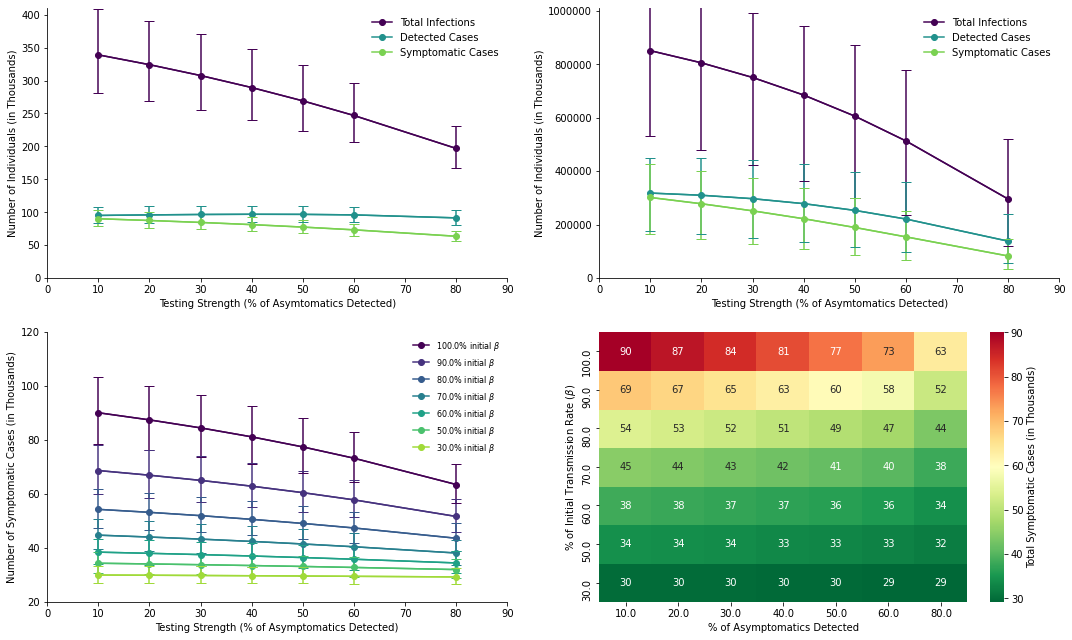

In [6]:
plt.figure(figsize=(15,9))
ax1 = plt.subplot(2,2,1)

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.4]


ax1.plot(df[df['New Transmission Rate']==100]["New Fraction of detected asymptomatics"],df[df['New Transmission Rate']==100]["Total Infected T2"]/1000,'o-',color=plt.cm.viridis(0.0),label='Total Infections')
ax1.errorbar(df[df['New Transmission Rate']==100]["New Fraction of detected asymptomatics"],df[df['New Transmission Rate']==100]["Total Infected T2"]/1000,color=plt.cm.viridis(0.0),capsize=5,yerr=[df[df['New Transmission Rate']==100]["Total Infected T2"]/1000-df[df['New Transmission Rate']==100]["Total Infected T2 (lower 95%)"]/1000,df[df['New Transmission Rate']==100]["Total Infected T2 (upper 95%)"]/1000-df[df['New Transmission Rate']==100]["Total Infected T2"]/1000])
ax1.plot(df[df['New Transmission Rate']==100]["New Fraction of detected asymptomatics"],df[df['New Transmission Rate']==100]["Detected T2"]/1000,'o-',color=plt.cm.viridis(0.5),label='Detected Cases')
ax1.errorbar(df[df['New Transmission Rate']==100]["New Fraction of detected asymptomatics"],df[df['New Transmission Rate']==100]["Detected T2"]/1000,color=plt.cm.viridis(0.5),capsize=5,yerr=[df[df['New Transmission Rate']==100]["Detected T2"]/1000-df[df['New Transmission Rate']==100]["Detected T2 (lower 95%)"]/1000,df[df['New Transmission Rate']==100]["Detected T2 (upper 95%)"]/1000-df[df['New Transmission Rate']==100]["Detected T2"]/1000])
ax1.plot(df[df['New Transmission Rate']==100]["New Fraction of detected asymptomatics"],df[df['New Transmission Rate']==100]["Detected Symptomatic T2"]/1000,'o-',color=plt.cm.viridis(0.8),label='Symptomatic Cases')
ax1.errorbar(df[df['New Transmission Rate']==100]["New Fraction of detected asymptomatics"],df[df['New Transmission Rate']==100]["Detected Symptomatic T2"]/1000,color=plt.cm.viridis(0.8),capsize=5,yerr=[df[df['New Transmission Rate']==100]["Detected Symptomatic T2"]/1000-df[df['New Transmission Rate']==100]["Detected Symptomatic T2 (lower 95%)"]/1000,df[df['New Transmission Rate']==100]["Detected Symptomatic T2 (upper 95%)"]/1000-df[df['New Transmission Rate']==100]["Detected Symptomatic T2"]/1000])

ax1.set_xlim(0,90)
ax1.set_ylim(0,410)
ax1.set_xlabel("Testing Strength (% of Asymtomatics Detected)")
ax1.set_ylabel("Number of Individuals (in Thousands)")
plt.legend(frameon=False)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

ax2 = plt.subplot(2,2,2)
ax2.plot(df[df['New Transmission Rate']==100]["New Fraction of detected asymptomatics"],df[df['New Transmission Rate']==100]["Total Infected T4"]/1000,'o-',color=plt.cm.viridis(0.0),label='Total Infections')
ax2.errorbar(df[df['New Transmission Rate']==100]["New Fraction of detected asymptomatics"],df[df['New Transmission Rate']==100]["Total Infected T4"]/1000,color=plt.cm.viridis(0.0),capsize=5,yerr=[df[df['New Transmission Rate']==100]["Total Infected T4"]/1000-df[df['New Transmission Rate']==100]["Total Infected T4 (lower 95%)"]/1000,df[df['New Transmission Rate']==100]["Total Infected T4 (upper 95%)"]/1000-df[df['New Transmission Rate']==100]["Total Infected T4"]/1000])
ax2.plot(df[df['New Transmission Rate']==100]["New Fraction of detected asymptomatics"],df[df['New Transmission Rate']==100]["Detected T4"]/1000,'o-',color=plt.cm.viridis(0.5),label='Detected Cases')
ax2.errorbar(df[df['New Transmission Rate']==100]["New Fraction of detected asymptomatics"],df[df['New Transmission Rate']==100]["Detected T4"]/1000,color=plt.cm.viridis(0.5),capsize=5,yerr=[df[df['New Transmission Rate']==100]["Detected T4"]/1000-df[df['New Transmission Rate']==100]["Detected T4 (lower 95%)"]/1000,df[df['New Transmission Rate']==100]["Detected T4 (upper 95%)"]/1000-df[df['New Transmission Rate']==100]["Detected T4"]/1000])
ax2.plot(df[df['New Transmission Rate']==100]["New Fraction of detected asymptomatics"],df[df['New Transmission Rate']==100]["Detected Symptomatic T4"]/1000,'o-',color=plt.cm.viridis(0.8),label='Symptomatic Cases')
ax2.errorbar(df[df['New Transmission Rate']==100]["New Fraction of detected asymptomatics"],df[df['New Transmission Rate']==100]["Detected Symptomatic T4"]/1000,color=plt.cm.viridis(0.8),capsize=5,yerr=[df[df['New Transmission Rate']==100]["Detected Symptomatic T4"]/1000-df[df['New Transmission Rate']==100]["Detected Symptomatic T4 (lower 95%)"]/1000,df[df['New Transmission Rate']==100]["Detected Symptomatic T4 (upper 95%)"]/1000-df[df['New Transmission Rate']==100]["Detected Symptomatic T4"]/1000])

ax2.set_xlim(0,90)
ax2.set_ylim(0,1010000)
ax2.set_xlabel("Testing Strength (% of Asymtomatics Detected)")
ax2.set_ylabel("Number of Individuals (in Thousands)")
plt.legend(frameon=False)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.get_yaxis().get_major_formatter().set_scientific(False)

ax3 = plt.subplot(2,2,3)
maxn = df["New Transmission Rate"].nunique()
for n,i in enumerate(df["New Transmission Rate"].unique()):
    ax3.plot(df[df["New Transmission Rate"]==i]["New Fraction of detected asymptomatics"],df[df["New Transmission Rate"]==i]["Detected Symptomatic T2"]/1000,'o-',color=plt.cm.viridis(n/maxn),label=r'{}% initial $\beta$'.format(i))
    ax3.errorbar(df[df["New Transmission Rate"]==i]["New Fraction of detected asymptomatics"],df[df["New Transmission Rate"]==i]["Detected Symptomatic T2"]/1000,color=plt.cm.viridis(n/maxn),capsize=5,yerr=[df[df["New Transmission Rate"]==i]["Detected Symptomatic T2"]/1000-df[df["New Transmission Rate"]==i]["Detected Symptomatic T2 (lower 95%)"]/1000,df[df["New Transmission Rate"]==i]["Detected Symptomatic T2 (upper 95%)"]/1000-df[df["New Transmission Rate"]==i]["Detected Symptomatic T2"]/1000])

ax3.set_xlim(0,90)
ax3.set_ylim(20,120)
ax3.set_xlabel("Testing Strength (% of Asymptomatics Detected)")
ax3.set_ylabel("Number of Symptomatic Cases (in Thousands)")
plt.legend(frameon=False,fontsize=8)
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)

ax4 = plt.subplot(2,2,4)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Detected Symptomatic T2")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax4)
ax4.set_ylim([0,7])
ax4.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax4.set_xlabel("% of Asymptomatics Detected")

plt.tight_layout()
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.savefig("Figures/Fig5.png",dpi =600, transparent=True)

## Supplementary Figure 10

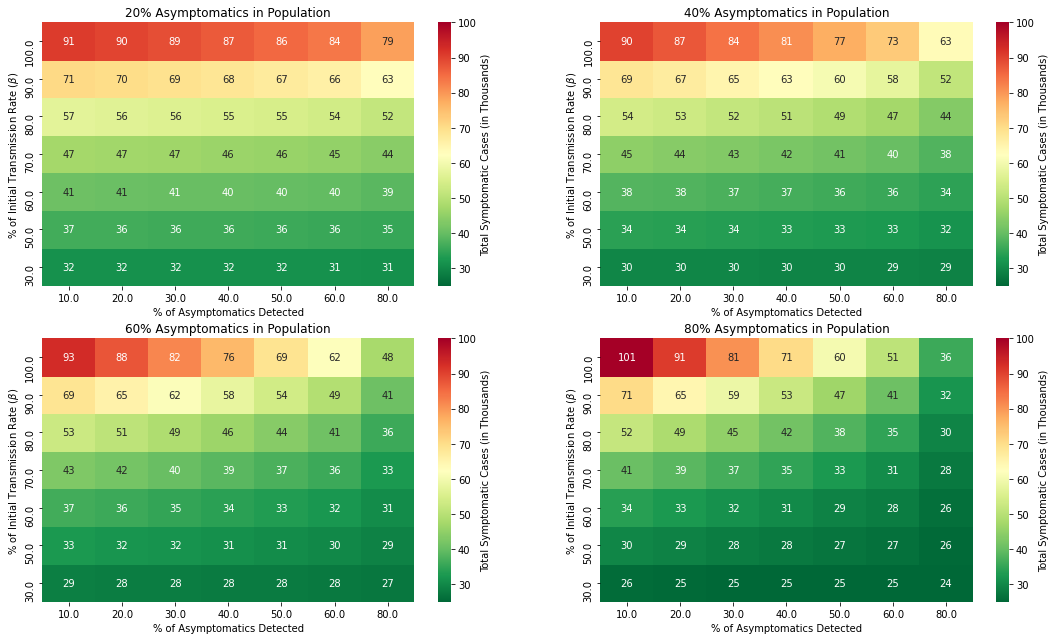

In [7]:
plt.figure(figsize=(15,9))

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.2]
ax1 = plt.subplot(2,2,1)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Detected Symptomatic T2")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax1,vmax=100,vmin=25)
ax1.set_ylim([0,7])
ax1.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax1.set_xlabel("% of Asymptomatics Detected")
ax1.set_title("20% Asymptomatics in Population")

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.4]
ax2 = plt.subplot(2,2,2)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Detected Symptomatic T2")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax2,vmax=100,vmin=25)
ax2.set_ylim([0,7])
ax2.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax2.set_xlabel("% of Asymptomatics Detected")
ax2.set_title("40% Asymptomatics in Population")

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.6]
ax3 = plt.subplot(2,2,3)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Detected Symptomatic T2")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax3,vmax=100,vmin=25)
ax3.set_ylim([0,7])
ax3.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax3.set_xlabel("% of Asymptomatics Detected")
ax3.set_title("60% Asymptomatics in Population")

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.8]
ax4 = plt.subplot(2,2,4)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Detected Symptomatic T2")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax4,vmax=100,vmin=25)
ax4.set_ylim([0,7])
ax4.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax4.set_xlabel("% of Asymptomatics Detected")
ax4.set_title("80% Asymptomatics in Population")

plt.tight_layout()
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.savefig("Figures/SuppFig10.png",dpi =600, transparent=True)

## Supplementary Figure 11

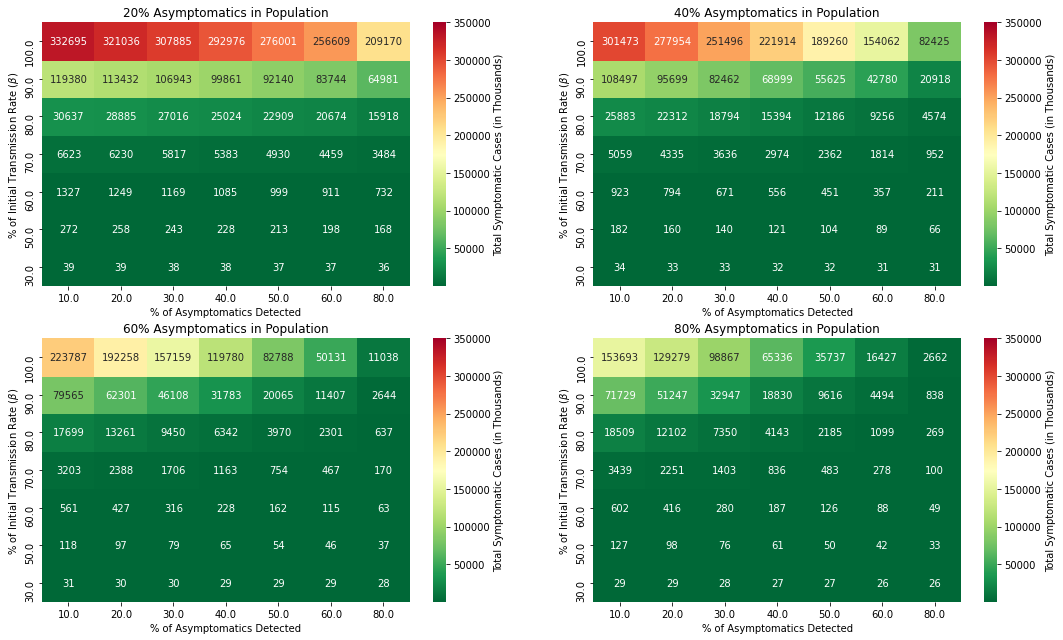

In [8]:
plt.figure(figsize=(15,9))

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.2]
ax1 = plt.subplot(2,2,1)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Detected Symptomatic T4")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax1,vmax=350000,vmin=24)
ax1.set_ylim([0,7])
ax1.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax1.set_xlabel("% of Asymptomatics Detected")
ax1.set_title("20% Asymptomatics in Population")

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.4]
ax2 = plt.subplot(2,2,2)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Detected Symptomatic T4")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax2,vmax=350000,vmin=24)
ax2.set_ylim([0,7])
ax2.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax2.set_xlabel("% of Asymptomatics Detected")
ax2.set_title("40% Asymptomatics in Population")

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.6]
ax3 = plt.subplot(2,2,3)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Detected Symptomatic T4")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax3,vmax=350000,vmin=24)
ax3.set_ylim([0,7])
ax3.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax3.set_xlabel("% of Asymptomatics Detected")
ax3.set_title("60% Asymptomatics in Population")

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.8]
ax4 = plt.subplot(2,2,4)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Detected Symptomatic T4")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax4,vmax=350000,vmin=24)
ax4.set_ylim([0,7])
ax4.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax4.set_xlabel("% of Asymptomatics Detected")
ax4.set_title("80% Asymptomatics in Population")

plt.tight_layout()
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.savefig("Figures/SuppFig11.png",dpi =600, transparent=True)

## Supplementary Figure 13

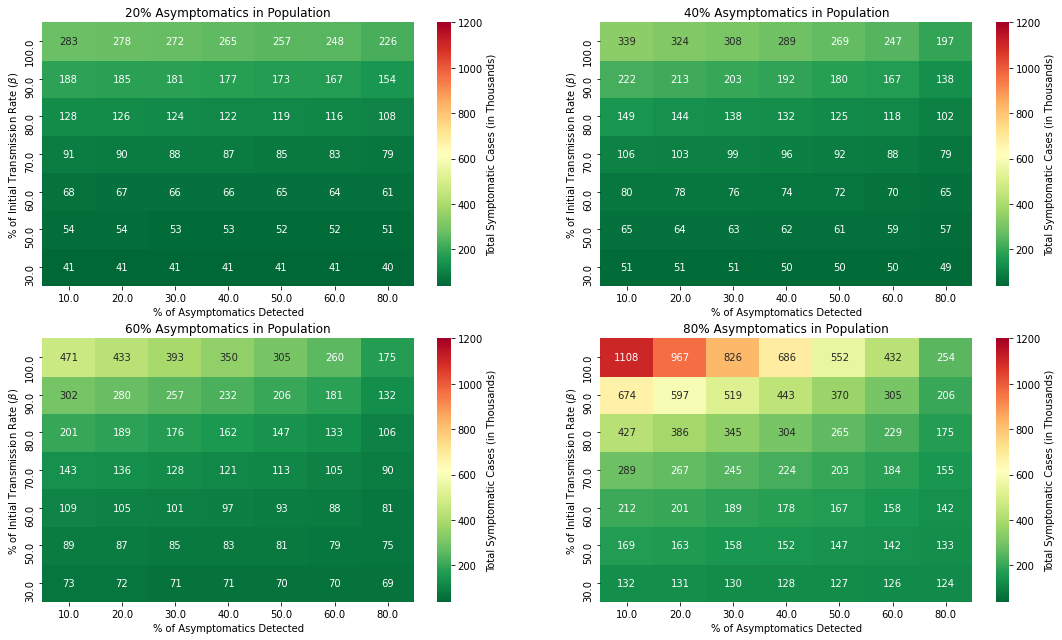

In [9]:
plt.figure(figsize=(15,9))

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.2]
ax1 = plt.subplot(2,2,1)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Total Infected T2")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax1,vmax=1200,vmin=40)
ax1.set_ylim([0,7])
ax1.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax1.set_xlabel("% of Asymptomatics Detected")
ax1.set_title("20% Asymptomatics in Population")

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.4]
ax2 = plt.subplot(2,2,2)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Total Infected T2")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax2,vmax=1200,vmin=40)
ax2.set_ylim([0,7])
ax2.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax2.set_xlabel("% of Asymptomatics Detected")
ax2.set_title("40% Asymptomatics in Population")

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.6]
ax3 = plt.subplot(2,2,3)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Total Infected T2")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax3,vmax=1200,vmin=40)
ax3.set_ylim([0,7])
ax3.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax3.set_xlabel("% of Asymptomatics Detected")
ax3.set_title("60% Asymptomatics in Population")

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.8]
ax4 = plt.subplot(2,2,4)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Total Infected T2")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax4,vmax=1200,vmin=40)
ax4.set_ylim([0,7])
ax4.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax4.set_xlabel("% of Asymptomatics Detected")
ax4.set_title("80% Asymptomatics in Population")

plt.tight_layout()
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.savefig("Figures/SuppFig13.png",dpi =600, transparent=True)

## Supplementary Figure 14

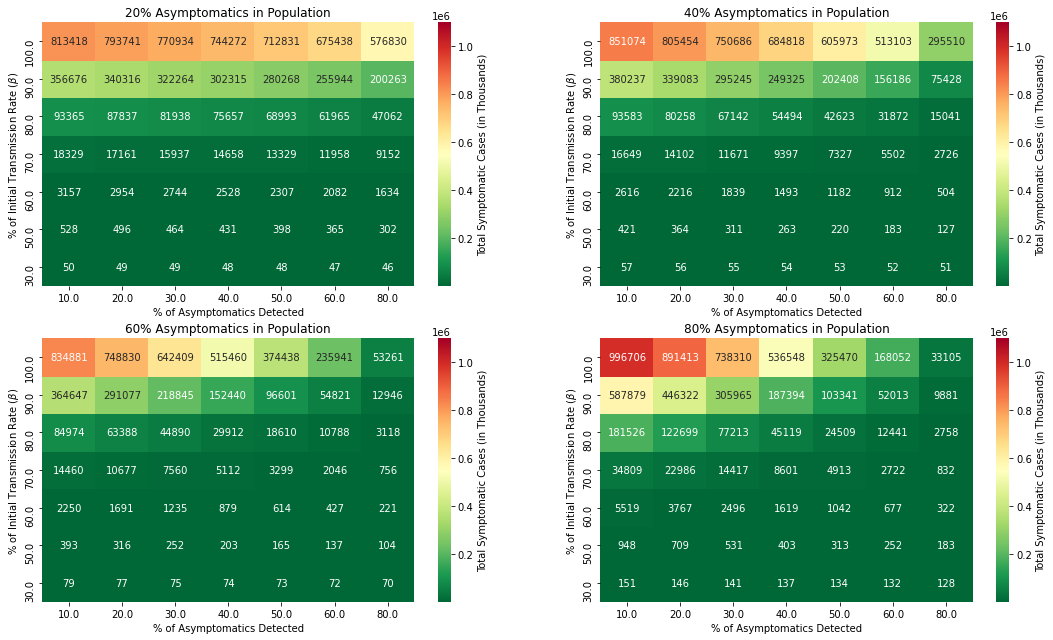

In [10]:
plt.figure(figsize=(15,9))

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.2]
ax1 = plt.subplot(2,2,1)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Total Infected T4")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax1,vmax=1100000,vmin=40)
ax1.set_ylim([0,7])
ax1.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax1.set_xlabel("% of Asymptomatics Detected")
ax1.set_title("20% Asymptomatics in Population")

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.4]
ax2 = plt.subplot(2,2,2)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Total Infected T4")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax2,vmax=1100000,vmin=40)
ax2.set_ylim([0,7])
ax2.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax2.set_xlabel("% of Asymptomatics Detected")
ax2.set_title("40% Asymptomatics in Population")

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.6]
ax3 = plt.subplot(2,2,3)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Total Infected T4")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax3,vmax=1100000,vmin=40)
ax3.set_ylim([0,7])
ax3.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax3.set_xlabel("% of Asymptomatics Detected")
ax3.set_title("60% Asymptomatics in Population")

df = pd.read_csv("output_testing.csv",index_col=0)
df=df[df['Fraction Asymptomatic']==0.8]
ax4 = plt.subplot(2,2,4)
sns.heatmap(df.pivot(index='New Transmission Rate',columns="New Fraction of detected asymptomatics",values="Total Infected T4")/1000,cmap='RdYlGn_r',annot=True,fmt="0.0f",cbar_kws={'label': 'Total Symptomatic Cases (in Thousands)'},ax=ax4,vmax=1100000,vmin=40)
ax4.set_ylim([0,7])
ax4.set_ylabel(r"% of Initial Transmission Rate ($\beta$)")
ax4.set_xlabel("% of Asymptomatics Detected")
ax4.set_title("80% Asymptomatics in Population")

plt.tight_layout()
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.savefig("Figures/SuppFig14.png",dpi =600, transparent=True)

## Supplementary Figure 12

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


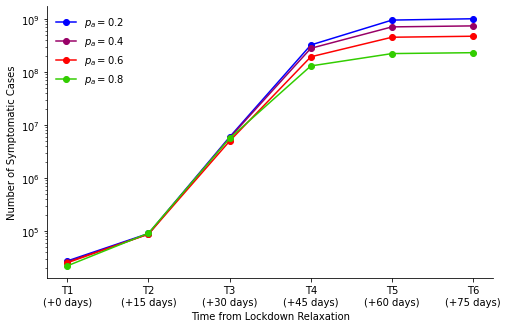

In [11]:
df = pd.read_csv("output_testing.csv",index_col=0)
plt.figure(figsize=(8,5))
plt.plot(df[df["Fraction Asymptomatic"]==0.2][['Detected Symptomatic T1','Detected Symptomatic T2','Detected Symptomatic T3','Detected Symptomatic T4','Detected Symptomatic T5','Detected Symptomatic T6']].values[7],'o-',label=r"$p_a=0.2$",color=plt.cm.brg(0.0))
plt.plot(df[df["Fraction Asymptomatic"]==0.4][['Detected Symptomatic T1','Detected Symptomatic T2','Detected Symptomatic T3','Detected Symptomatic T4','Detected Symptomatic T5','Detected Symptomatic T6']].values[7],'o-',label=r"$p_a=0.4$",color=plt.cm.brg(0.30))
plt.plot(df[df["Fraction Asymptomatic"]==0.6][['Detected Symptomatic T1','Detected Symptomatic T2','Detected Symptomatic T3','Detected Symptomatic T4','Detected Symptomatic T5','Detected Symptomatic T6']].values[7],'o-',label=r"$p_a=0.6$",color=plt.cm.brg(0.50))
plt.plot(df[df["Fraction Asymptomatic"]==0.8][['Detected Symptomatic T1','Detected Symptomatic T2','Detected Symptomatic T3','Detected Symptomatic T4','Detected Symptomatic T5','Detected Symptomatic T6']].values[7],'o-',label=r"$p_a=0.8$",color=plt.cm.brg(0.90))
plt.yscale('log')
plt.gca().set_xticklabels(['T{}\n(+{} days)'.format(i,(i-1)*15) for i in range(0,7)])
plt.xlabel('Time from Lockdown Relaxation')
plt.ylabel('Number of Symptomatic Cases')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(frameon=False)
plt.savefig('Figures/SuppFig12.png',dpi=600)

## Figure Inset Formatting

In [2]:
legend = Image.open('Figures/legend.png')
lwidth, lheight = legend.size
legend = legend.resize((int(lwidth*1.2),int(lheight*1.2)))

In [3]:
main = Image.open('Figures/Fig4A_Main.png')
inset = Image.open('Figures/Fig4A_Inset.png')
width, height = inset.size

In [4]:
inset = inset.crop(box=(0.25*width,0.4*height,0.85*width,0.93*height)).resize((int(width*0.27),int(height*0.27)))

In [5]:
width, height = main.size
main.paste(ImageOps.expand(inset,border=30,fill='lightgray'),(int(0.1*width),int(0.27*height)))

In [6]:
main.paste(legend,(int(0.1*width),int(0.05*height)))

In [7]:
main.save("Figures/Fig4A.png")

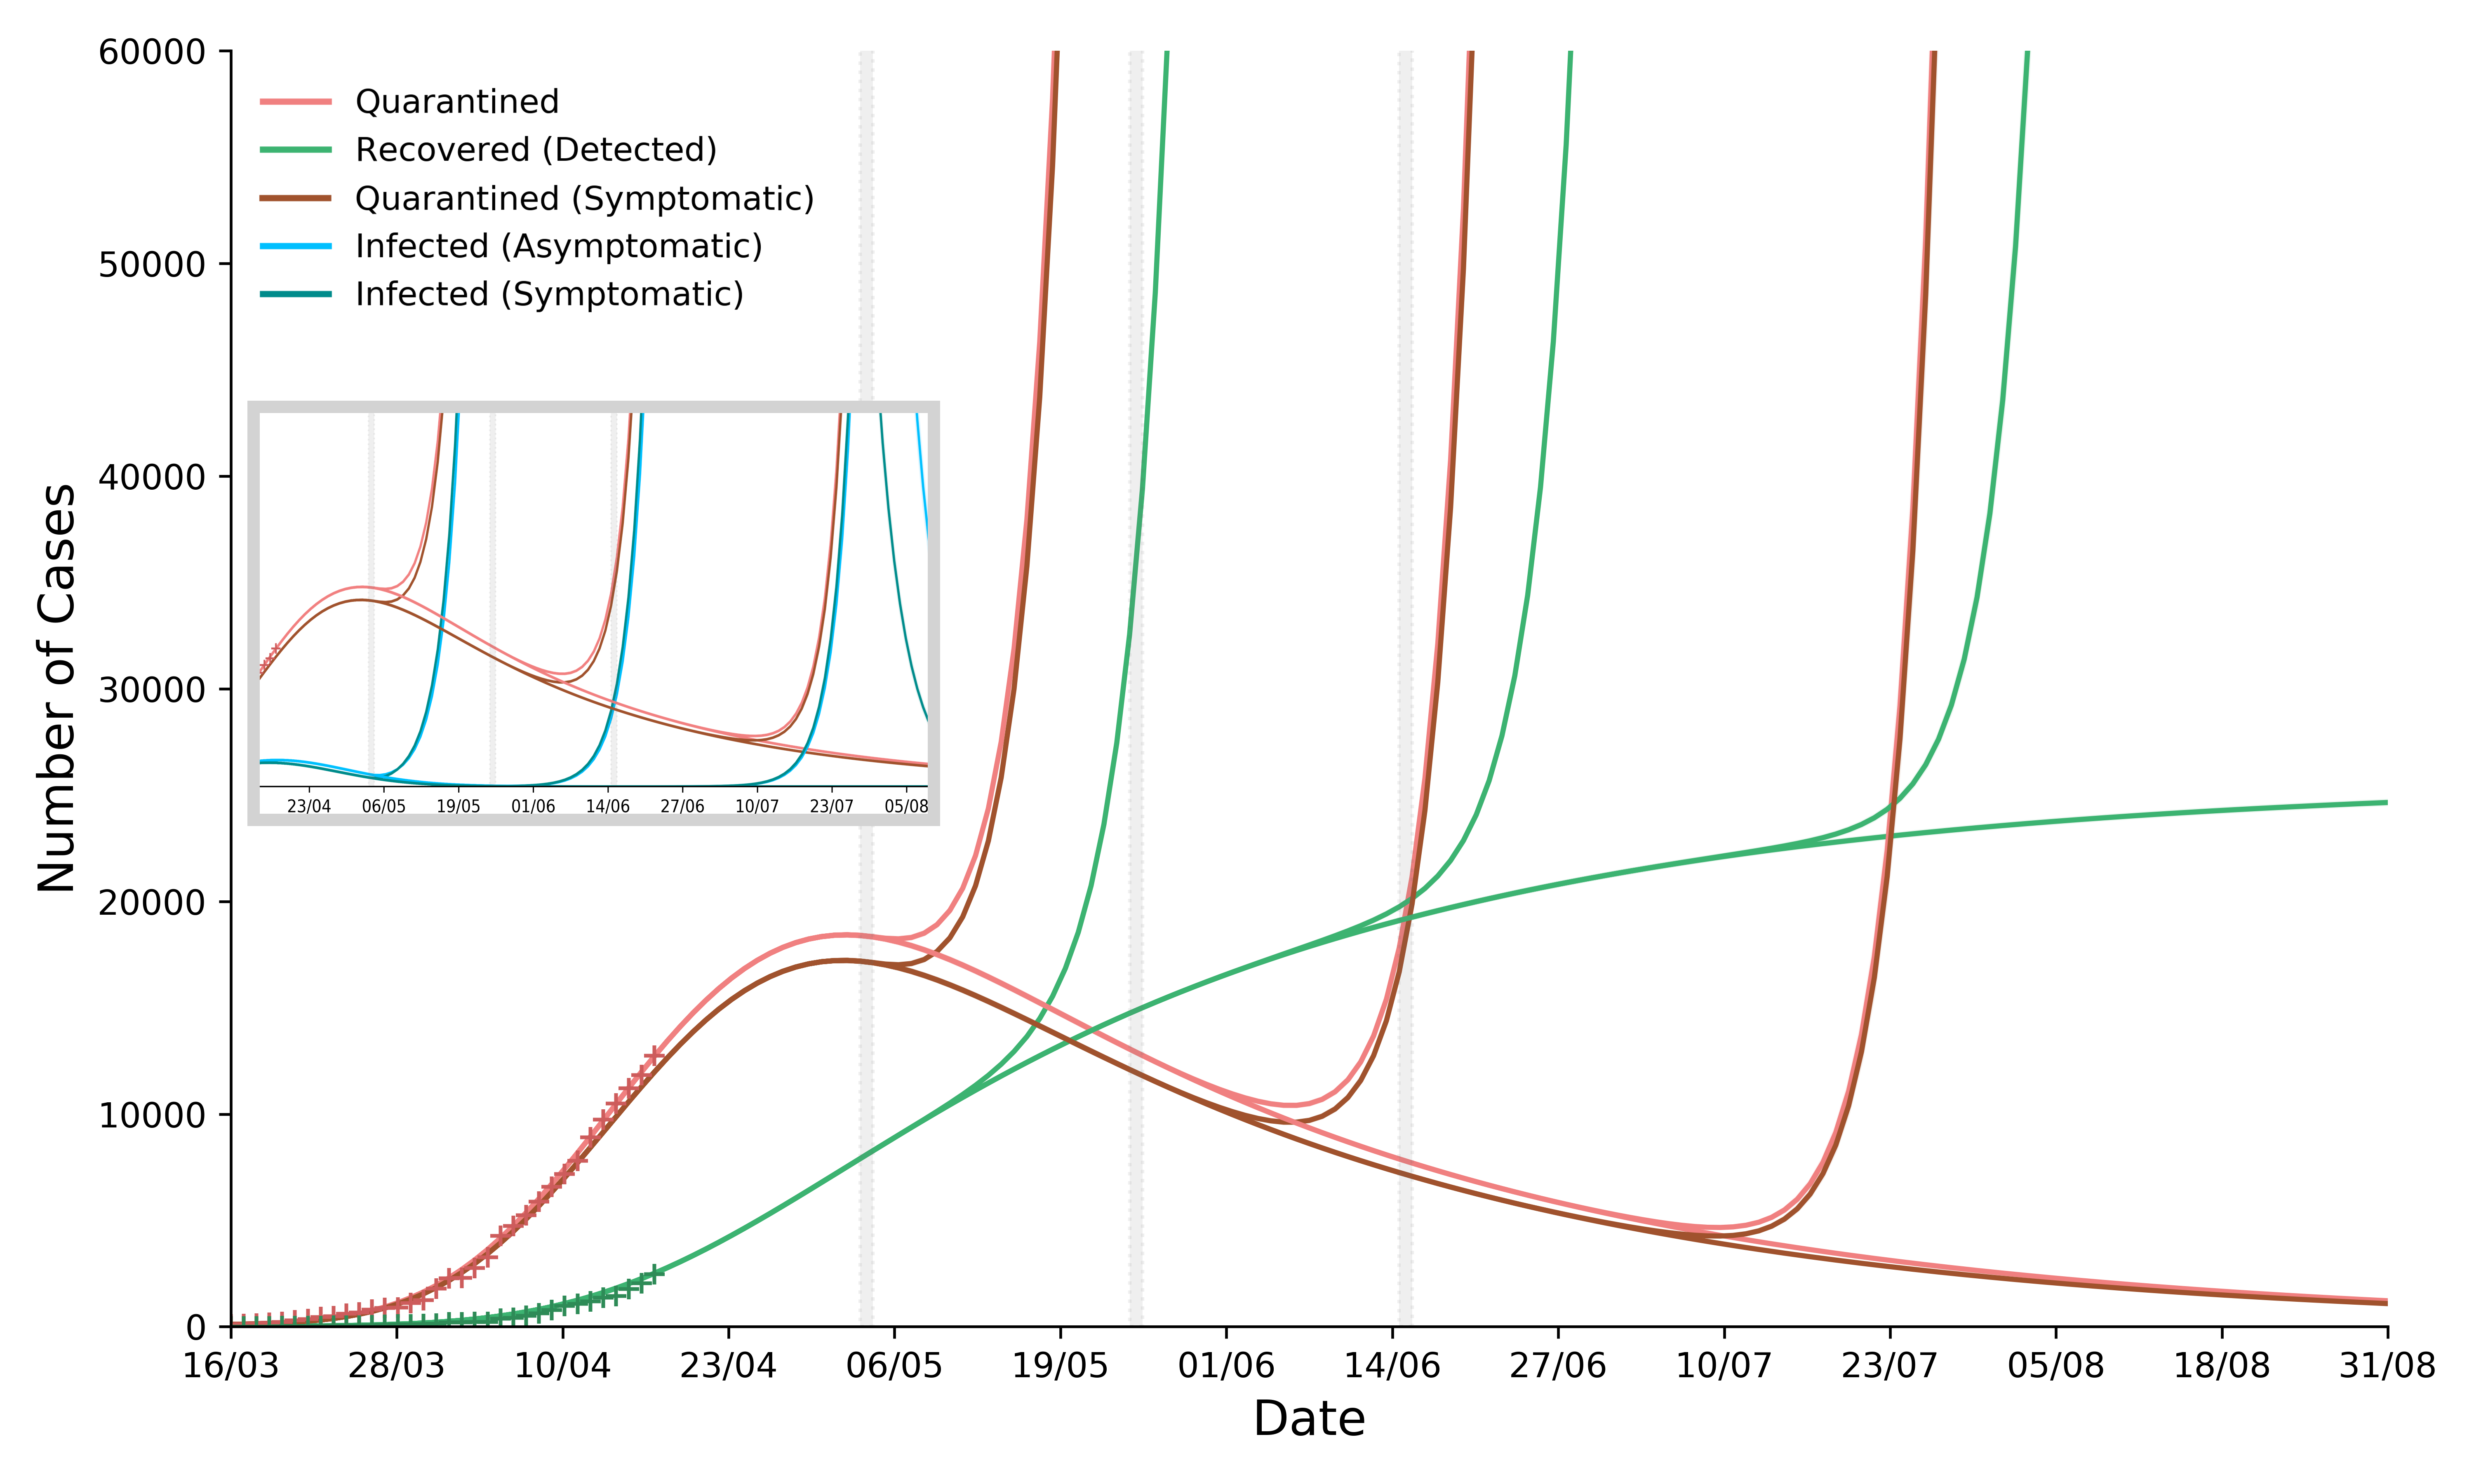

In [8]:
main

In [9]:
main = Image.open('Figures/Fig4C_Main.png')
inset = Image.open('Figures/Fig4C_Inset.png')
width, height = inset.size

In [10]:
inset = inset.crop(box=(0.25*width,0.4*height,0.85*width,0.93*height)).resize((int(width*0.27),int(height*0.27)))

In [11]:
width, height = main.size
main.paste(ImageOps.expand(inset,border=30,fill='lightgray'),(int(0.1*width),int(0.40*height)))

In [12]:
main.paste(legend,(int(0.1*width),int(0.05*height)))

In [13]:
main.save("Figures/Fig4C.png")

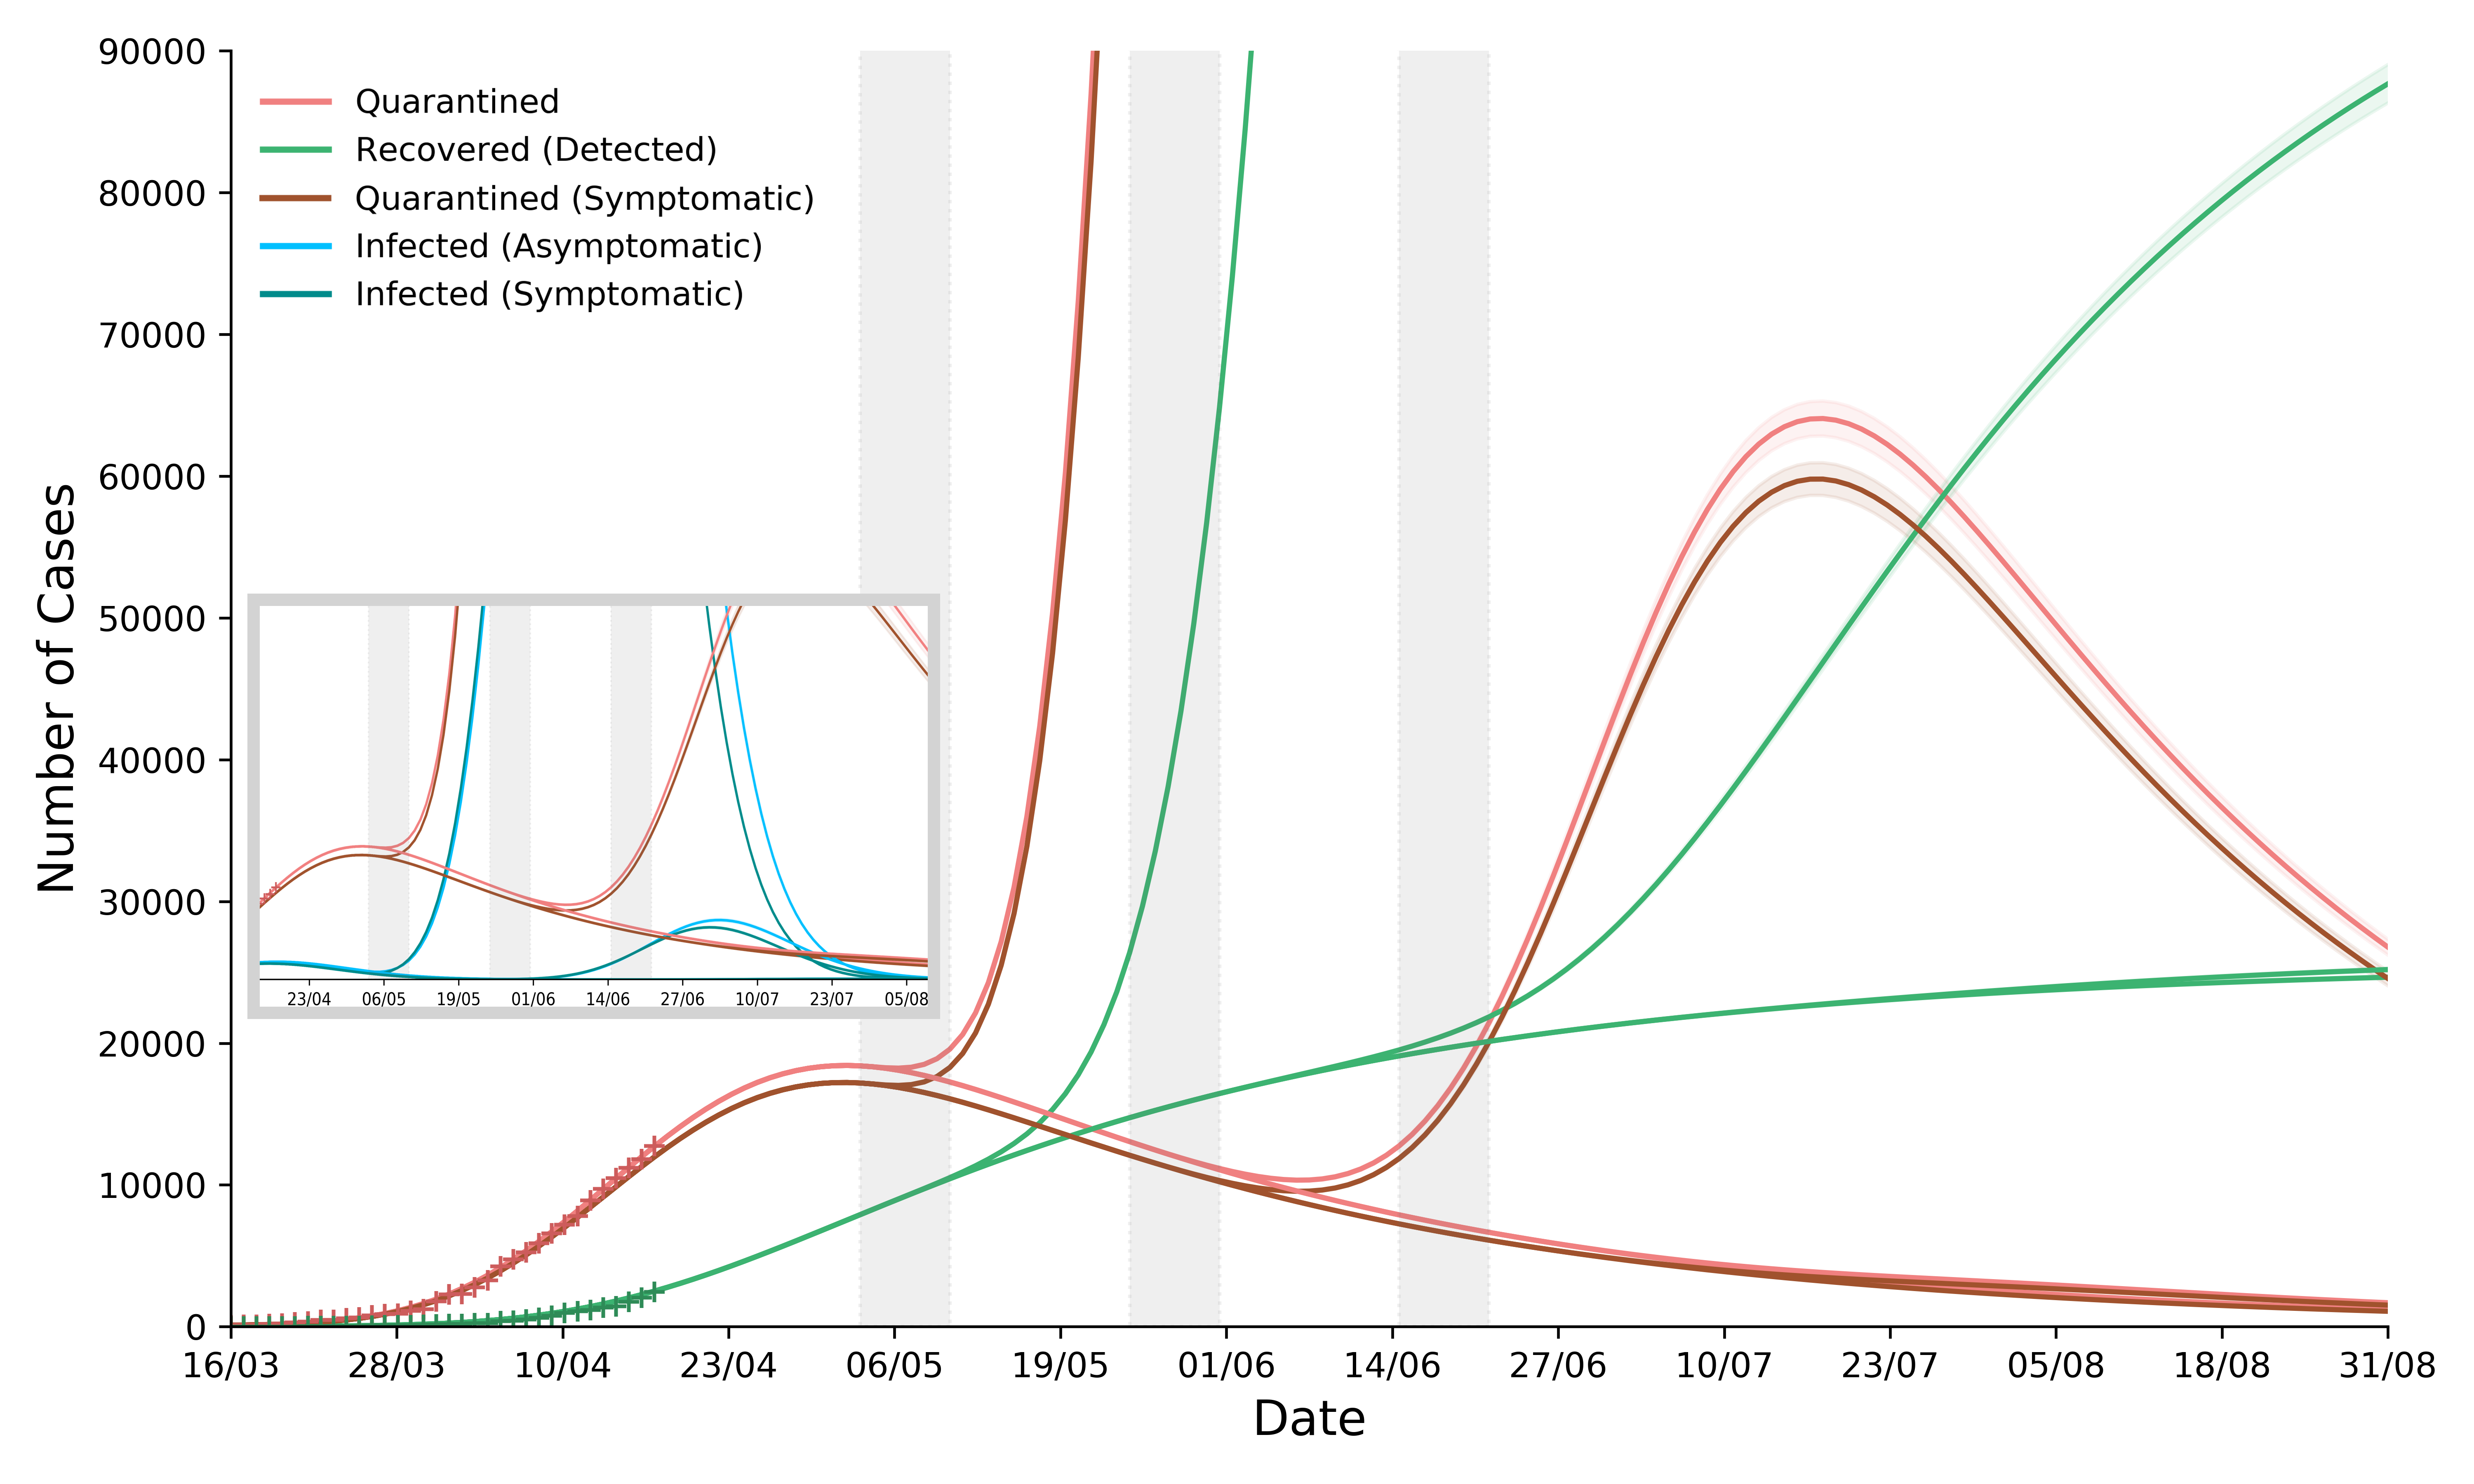

In [14]:
main

In [15]:
main = Image.open('Figures/SuppFig15_Main.png')
inset = Image.open('Figures/SuppFig15_Inset.png')
width, height = inset.size

In [16]:
inset = inset.crop(box=(0.25*width,0.4*height,0.85*width,0.93*height)).resize((int(width*0.27),int(height*0.27)))

In [17]:
width, height = main.size
main.paste(ImageOps.expand(inset,border=30,fill='lightgray'),(int(0.1*width),int(0.32*height)))

In [18]:
main.paste(legend,(int(0.1*width),int(0.05*height)))

In [19]:
main.save("Figures/SuppFig15.png")

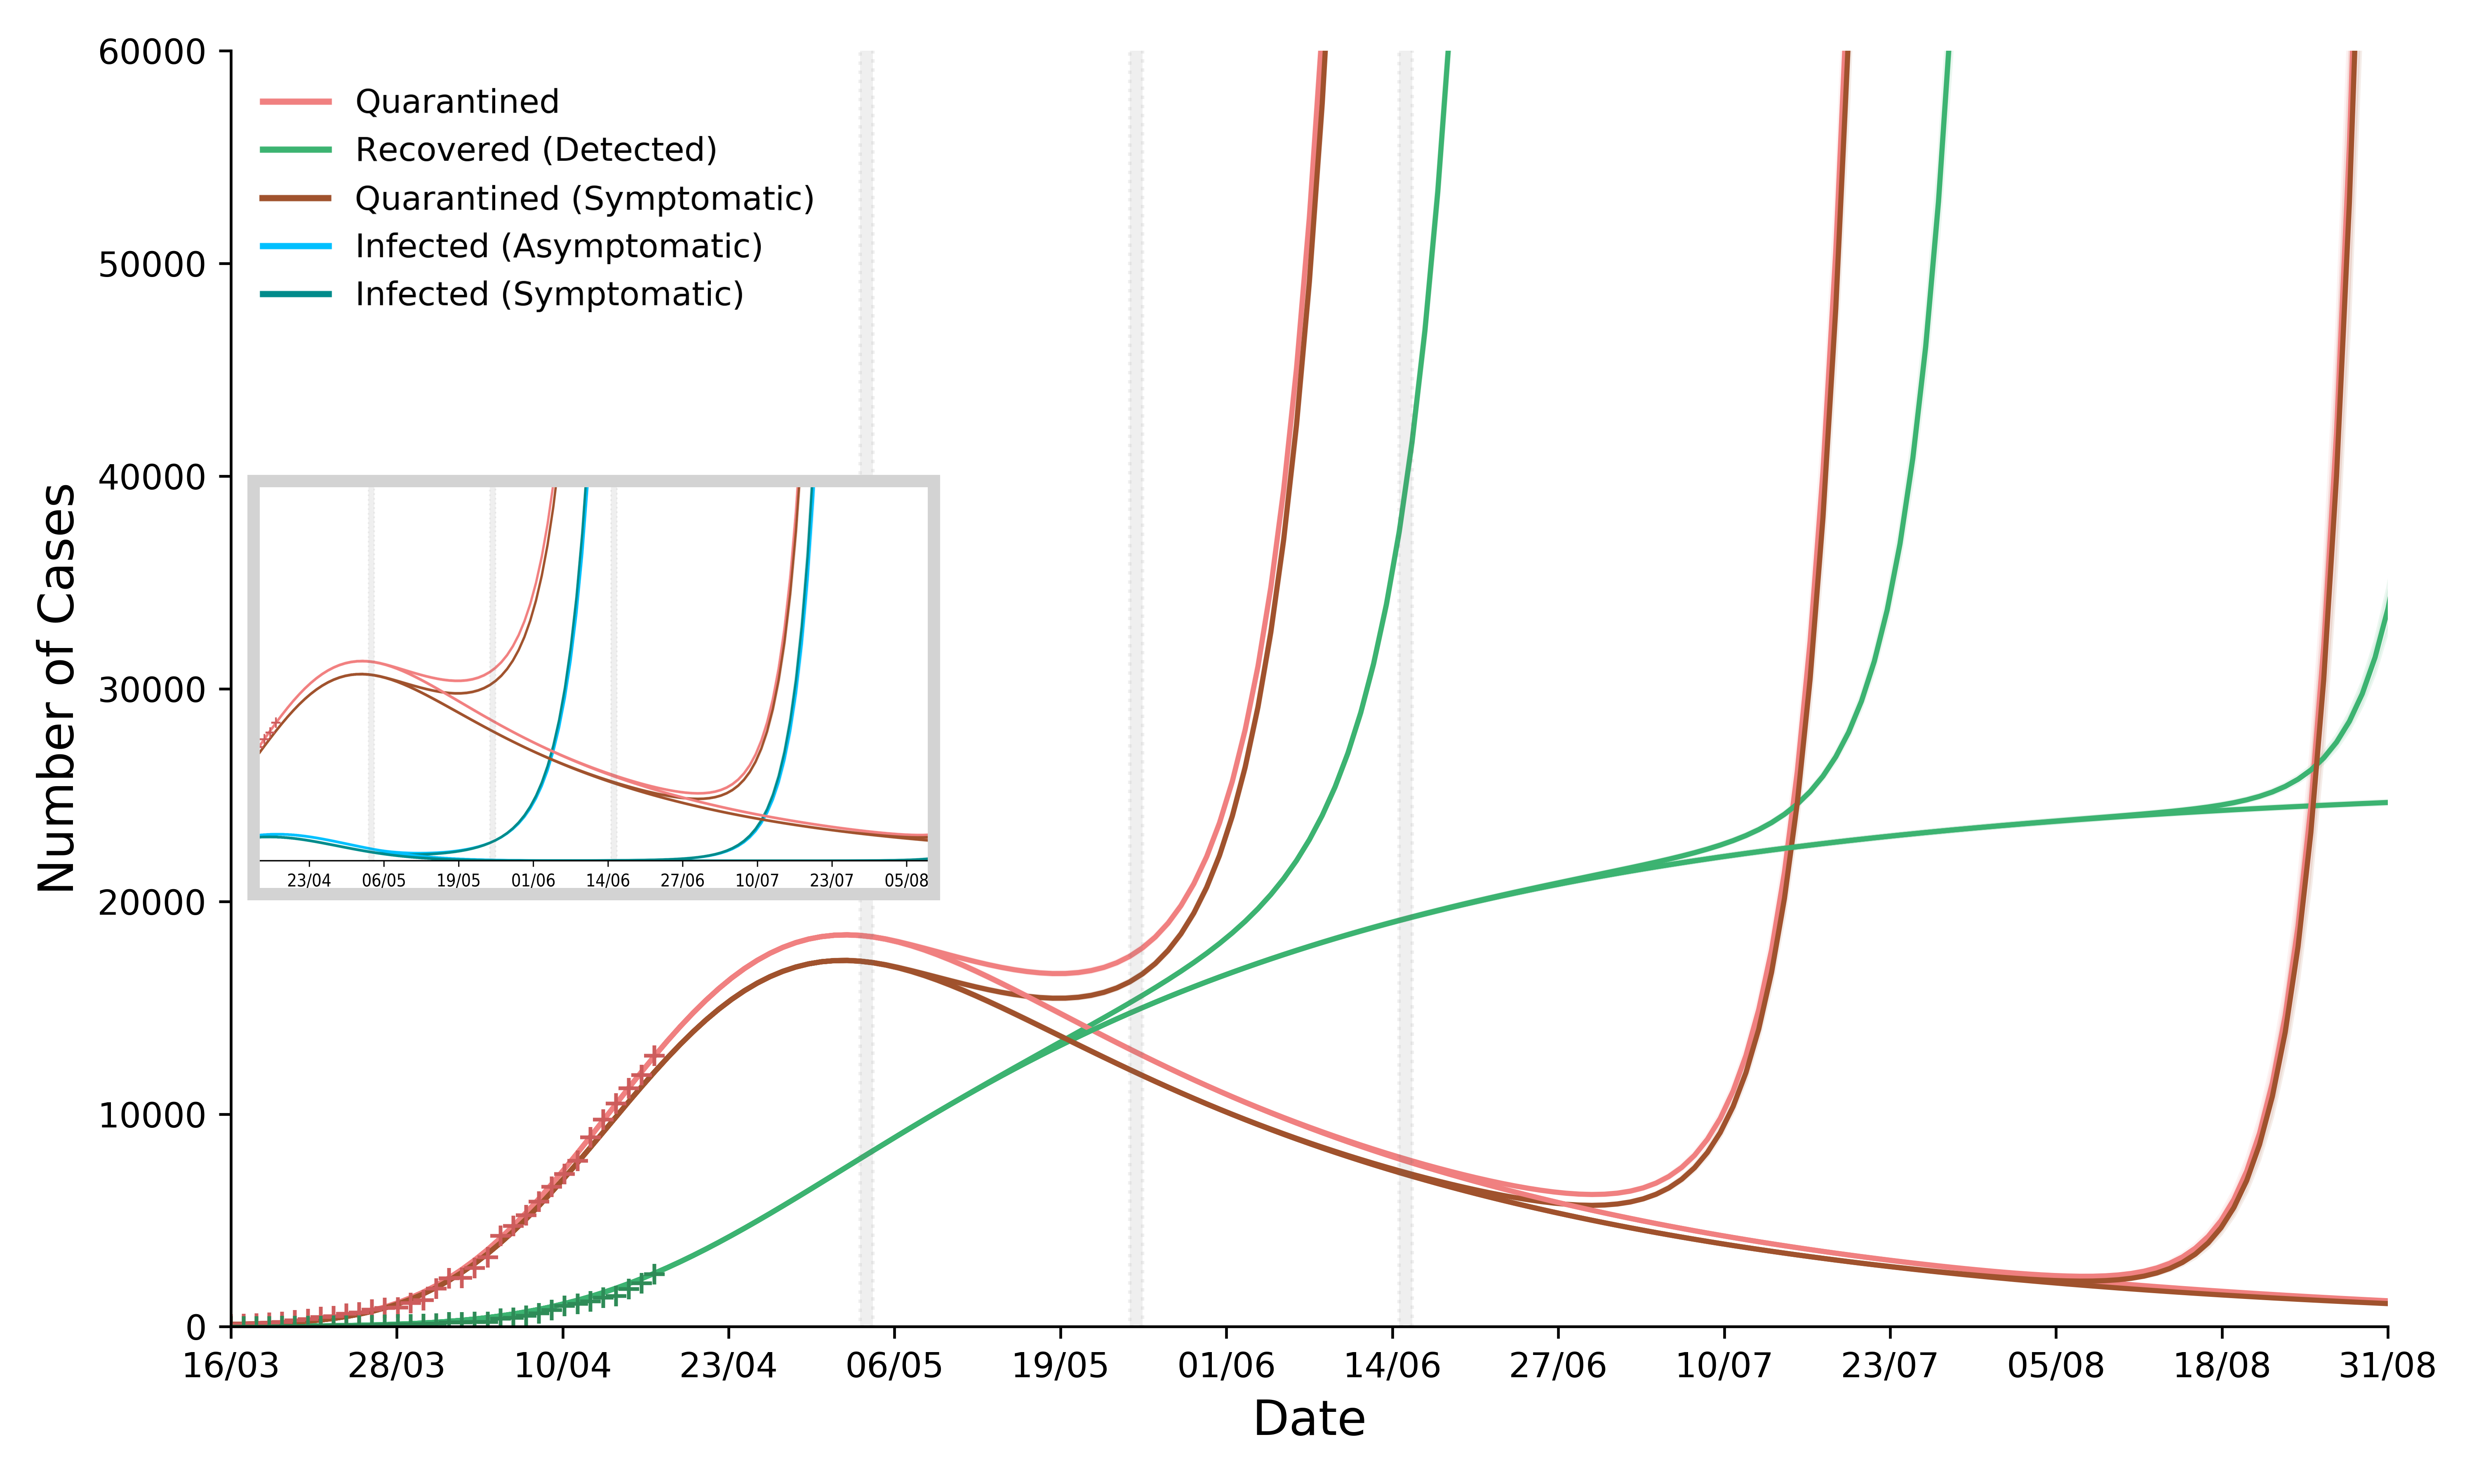

In [20]:
main

In [21]:
main = Image.open('Figures/SuppFig17_Main.png')
inset = Image.open('Figures/SuppFig17_Inset.png')
width, height = inset.size

In [22]:
inset = inset.crop(box=(0.25*width,0.4*height,0.85*width,0.93*height)).resize((int(width*0.27),int(height*0.27)))

In [23]:
width, height = main.size
main.paste(ImageOps.expand(inset,border=30,fill='lightgray'),(int(0.12*width),int(0.32*height)))

In [24]:
main.paste(legend,(int(0.12*width),int(0.05*height)))

In [25]:
main.save("Figures/SuppFig17.png")

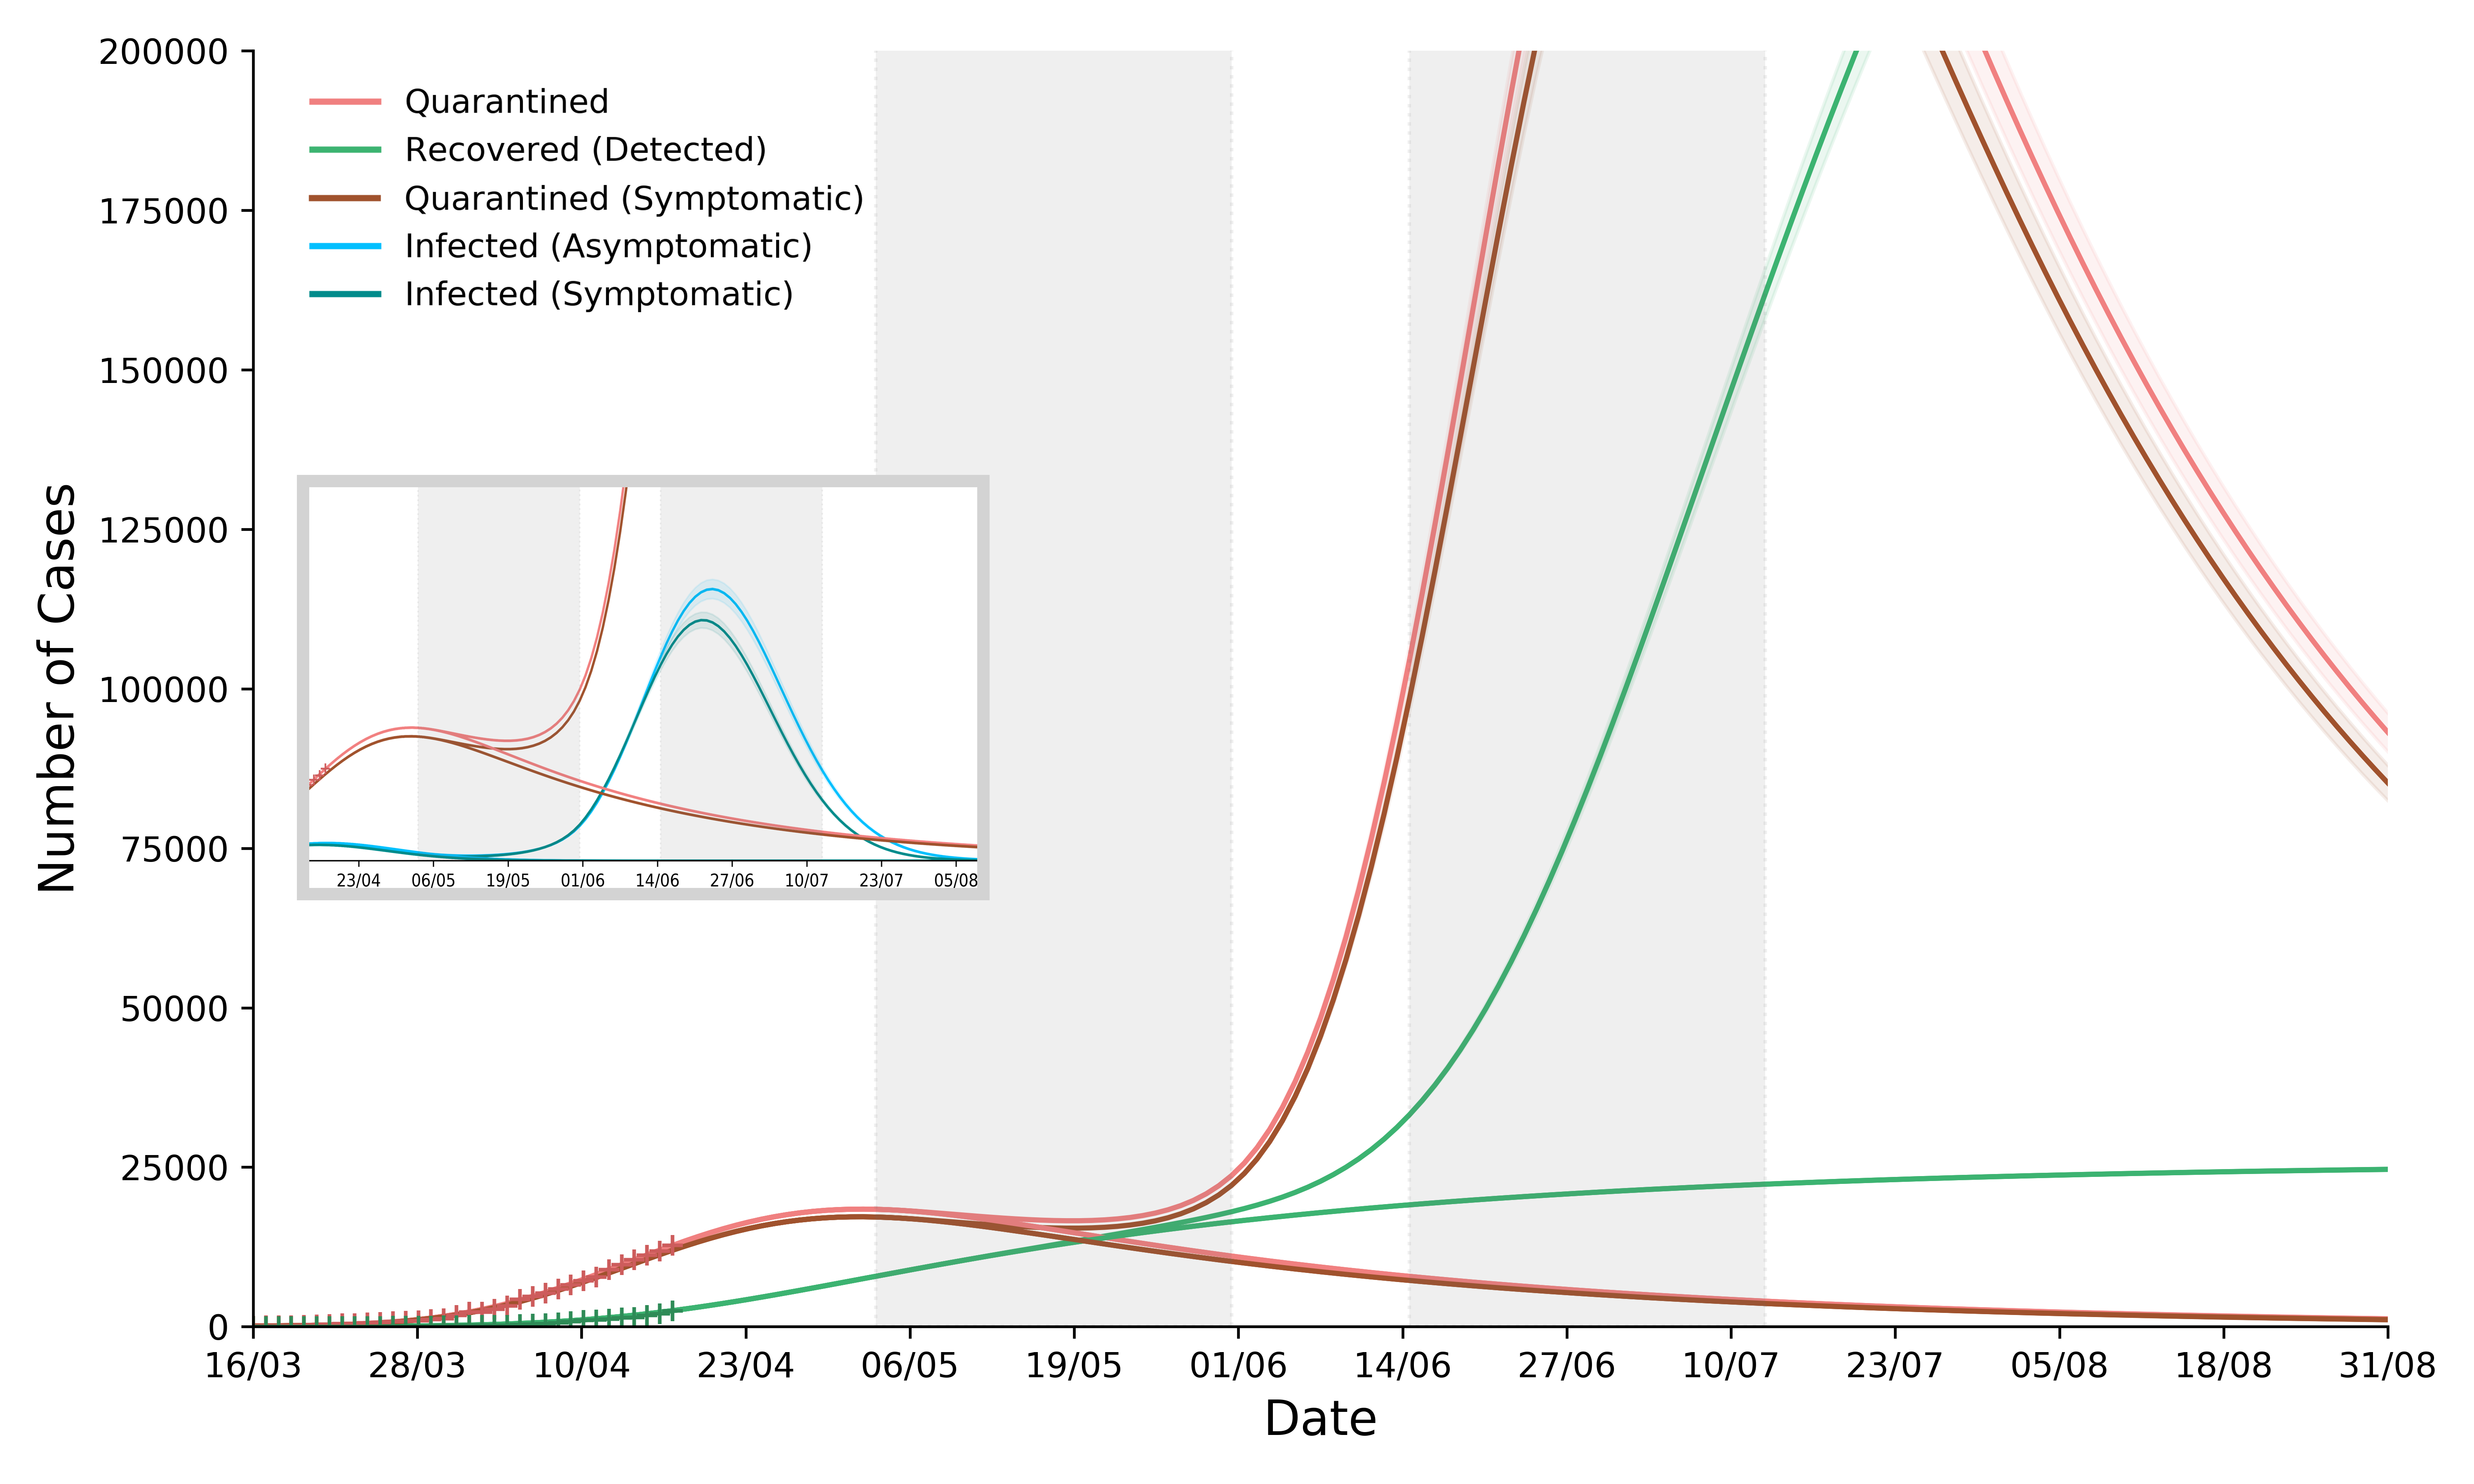

In [26]:
main